## A. Problem Statement

### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

### Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

# B. Data Dictionary


### Variable	           -       Description
* **Item_Identifier**  - 	     Unique product ID
* **Item_Weight**      -       Weight of product
* **Item_Fat_Content** -	     Whether the product is low fat or not
* **Item_Visibility**  -	     The % of total display area of all products in a store allocated to the particular product
* **Item_Type**        -  	 The category to which the product belongs
* **Item_MRP**         -	     Maximum Retail Price (list price) of the product
* **Outlet_Identifier**-	     Unique store ID
* **Outlet_Establishment_Year** - The year in which store was established
* **Outlet_Size**      -	     The size of the store in terms of ground area covered
* **Outlet_Location_Type**  -  The type of city in which the store is located
* **Outlet_Type**      -	     Whether the outlet is just a grocery store or some sort of supermarket
* **Item_Outlet_Sales** -  	 Sales of the product in the particular store. This is the outcome variable to be predicted

# **C. Pre-processing Steps**

<ol>1. Filling the missing values</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

In [867]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [868]:
# check version on pandas
print('Version of pandas:', pd.__version__)

Version of pandas: 2.1.4


In [869]:
# reading the loan prediction data
data = pd.read_csv('/content/sample_data/train_XnW6LSF.csv')
#data = pd.read_csv('train_XnW6LSF.csv')

In [870]:
# looking at the first five rows of the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [871]:
# shape of the data
data.shape

(8523, 12)

In [872]:
backup_actual_data = pd.DataFrame()
backup_actual_data['Item_Identifier'] = data['Item_Identifier'].copy()
backup_actual_data['Outlet_Identifier'] = data['Outlet_Identifier'].copy()
backup_actual_data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].copy()

In [873]:
data['Item_Outlet_Sales'].max()

13086.9648

In [874]:
# checking missing values in the data
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [875]:
# data types of the variables
data.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


## C-1. Variable itendification and coversion to respective data types.

In [876]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

,0
Item_Identifier,object
Item_Fat_Content,object
Item_Type,object
Outlet_Identifier,object
Outlet_Size,object
Outlet_Location_Type,object
Outlet_Type,object


In [877]:
#Converting object data type to category
data['Item_Identifier'] = data['Item_Identifier'].astype('category')
data['Item_Fat_Content'] = data['Item_Fat_Content'].astype('category')
data['Item_Type'] = data['Item_Type'].astype('category')
data['Outlet_Identifier'] = data['Outlet_Identifier'].astype('category')
data['Outlet_Size'] = data['Outlet_Size'].astype('category')
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].astype('category')
data['Outlet_Type'] = data['Outlet_Type'].astype('category')
data['Outlet_Establishment_Year'] = data['Outlet_Establishment_Year'].astype('category')

In [878]:
# check the updated datatypes.
data.dtypes

,0
Item_Identifier,category
Item_Weight,float64
Item_Fat_Content,category
Item_Visibility,float64
Item_Type,category
Item_MRP,float64
Outlet_Identifier,category
Outlet_Establishment_Year,category
Outlet_Size,category
Outlet_Location_Type,category


In [879]:
# isolating categorical datatypes
categorical = data.select_dtypes(include=['category'])[:]
categorical.dtypes

,0
Item_Identifier,category
Item_Fat_Content,category
Item_Type,category
Outlet_Identifier,category
Outlet_Establishment_Year,category
Outlet_Size,category
Outlet_Location_Type,category
Outlet_Type,category


### Since the Item_Outlet_Sales has float and continuous values, **this is a problem of Regression type**.

## C-2. Filling the missing values

### Categorical data: Mode

In [880]:
# filling missing values of categorical variables with mode

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

### Continuous data: Mean

In [881]:
# filling missing values of continuous variables with mean
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [882]:
# checking missing values after imputation
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


## C-3. Converting categories to numbers since our model only processes numerical data.

### a. Identifying Unique Values in Categories

In [883]:
# identififying unique category values for the category variables

item_identifier_unique_categories = data['Item_Identifier'].unique()

In [884]:
item_identifier_unique_categories.shape

(1559,)

In [885]:
data['Item_Fat_Content'].unique().value_counts()

,count
LF,1
Low Fat,1
Regular,1
low fat,1
reg,1


In [886]:
item_type_unique_categories = data['Item_Type'].unique()
item_type_unique_categories.shape

(16,)

In [887]:
outlet_identifier_unique_categories = data['Outlet_Identifier'].unique()
outlet_identifier_unique_categories.shape

(10,)

In [888]:
outlet_size_unique_categories = data['Outlet_Size'].unique()
outlet_size_unique_categories.shape

(3,)

In [889]:

outlet_location_type_unique_categories = data['Outlet_Location_Type'].unique()
outlet_location_type_unique_categories.shape

(3,)

In [890]:
outlet_type_unique_categories = data['Outlet_Type'].unique()
outlet_type_unique_categories.shape

(4,)

In [891]:
outlet_establishment_year_unique_categories = data['Outlet_Establishment_Year'].unique()
outlet_establishment_year_unique_categories.shape

(9,)

In [892]:
item_identifier_unique_categories = data['Item_Identifier'].unique()
item_identifier_unique_categories.shape

(1559,)

In [893]:
data.dtypes

,0
Item_Identifier,category
Item_Weight,float64
Item_Fat_Content,category
Item_Visibility,float64
Item_Type,category
Item_MRP,float64
Outlet_Identifier,category
Outlet_Establishment_Year,category
Outlet_Size,category
Outlet_Location_Type,category


### b. Normalizing and Encoding categories

In [894]:
# Normalizing categories
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'LF':'Low Fat', 'low fat': 'Low Fat', 'Low Fat':'Low Fat','reg':'Regular', 'Regular':'Regular'})

In [895]:
item_fat_content_unique_categories = data['Item_Fat_Content'].unique()
item_fat_content_unique_categories.shape

(2,)

#### C3-c. Label Encoder

In [897]:
# converting the categories into numbers using map function
lblencoder = LabelEncoder()
ohencoder = OneHotEncoder()


data['Item_Fat_Content'] = lblencoder.fit_transform(data['Item_Fat_Content'])

data['Outlet_Size'] = lblencoder.fit_transform(data['Outlet_Size'])

data['Outlet_Type'] = lblencoder.fit_transform(data['Outlet_Type'])

data['Outlet_Location_Type'] = lblencoder.fit_transform(data['Outlet_Location_Type'])


In [898]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052


In [899]:
data.dtypes

,0
Item_Identifier,category
Item_Weight,float64
Item_Fat_Content,int64
Item_Visibility,float64
Item_Type,category
Item_MRP,float64
Outlet_Identifier,category
Outlet_Establishment_Year,category
Outlet_Size,int64
Outlet_Location_Type,int64


#### C3-d. Univariate Analysis

In [900]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group, n1):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (size*n1,3), dpi = 300)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(x=data[i], fill=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

* -ve Values of Skew indicates bias towards right side and +ve values indicates bias towards left side.

* "As a general guideline, a **skewness value between −1 and +1 is considered excellent**, but a **value between −2 and +2 is generally considered acceptable**. **Values beyond −2 and +2 are considered indicative of substantial nonnormality.**" (Hair et al., 2022, p. 66).

* "the general guideline is that if the **kurtosis is greater than +2, the distribution is too peaked**. Likewise, **a kurtosis of less than −2 indicates a distribution that is too flat**. When **both skewness and kurtosis are close to zero, the pattern of responses is considered a normal distribution**(George & Mallery, 2019)." (Hair et al., 2022, p. 66).

* "When both skewness and kurtosis are zero (a situation that researchers are very unlikely to ever encounter), the pattern of responses is considered a normal distribution."

References

Hair, J. F., Hult, G. T. M., Ringle, C. M., & Sarstedt, M. (2022). A Primer on Partial Least Squares Structural Equation Modeling (PLS-SEM) (3 ed.). Thousand Oaks, CA: Sage.

In [901]:
df_numerical_columnss_values = data.select_dtypes(include=['int64','float64','Int32'])
numerical_columnss_values = df_numerical_columnss_values.columns.tolist()

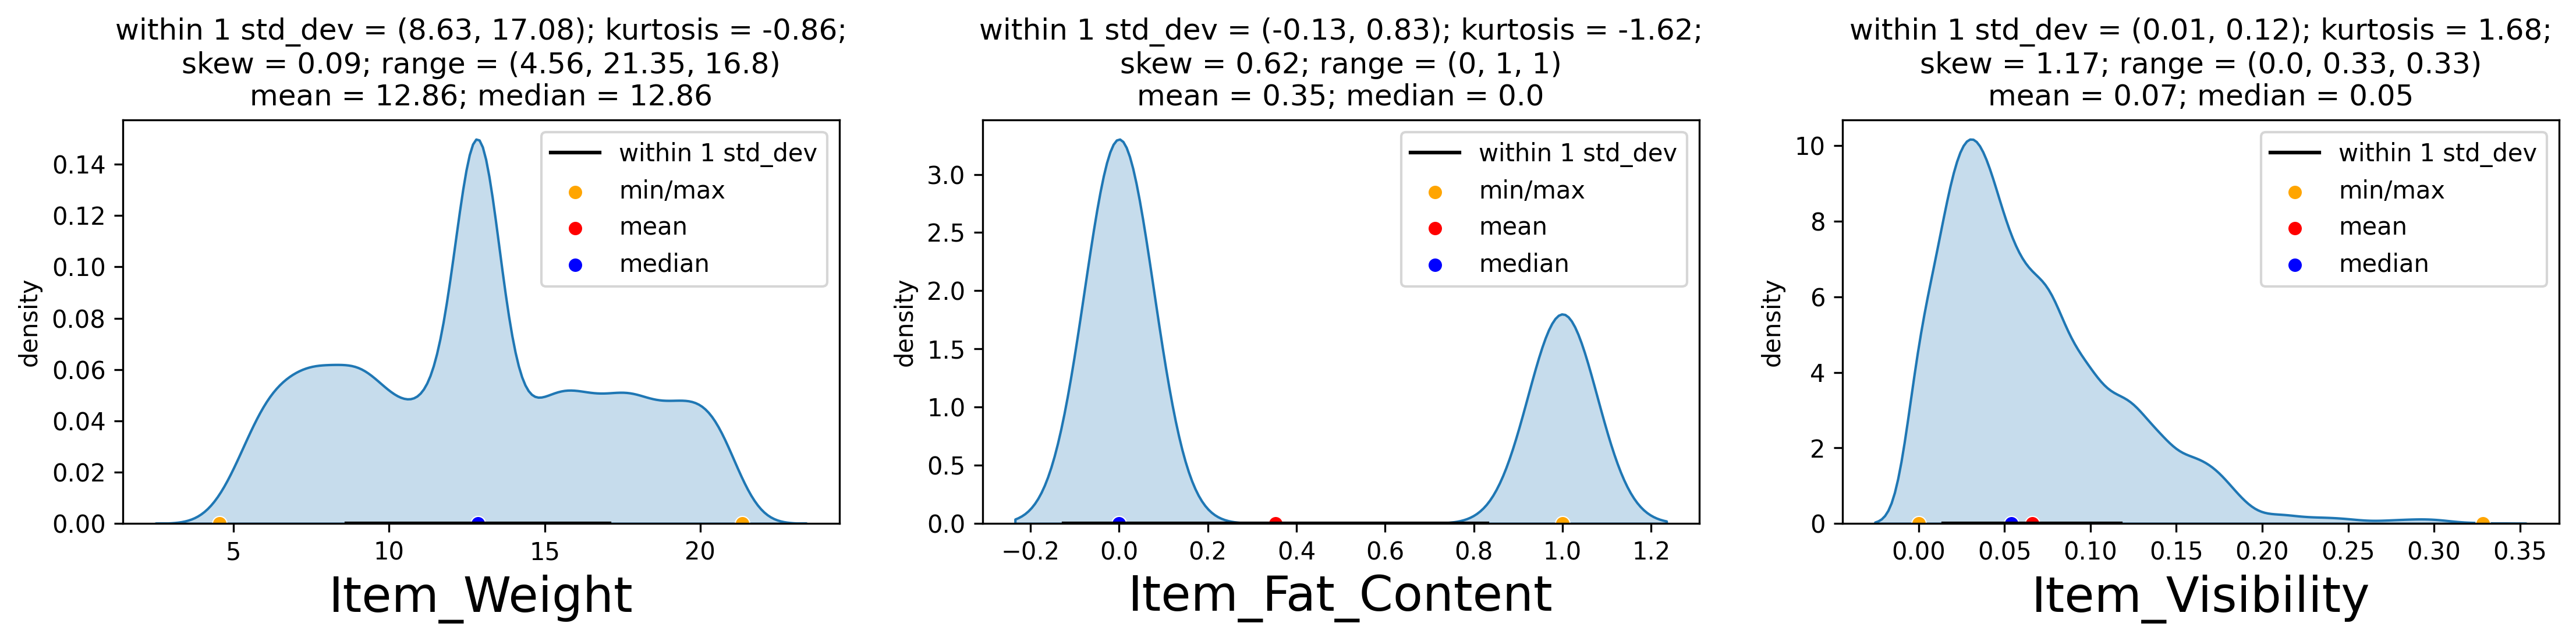

In [902]:
UVA_numeric(df_numerical_columnss_values, numerical_columnss_values[0:3], 6)

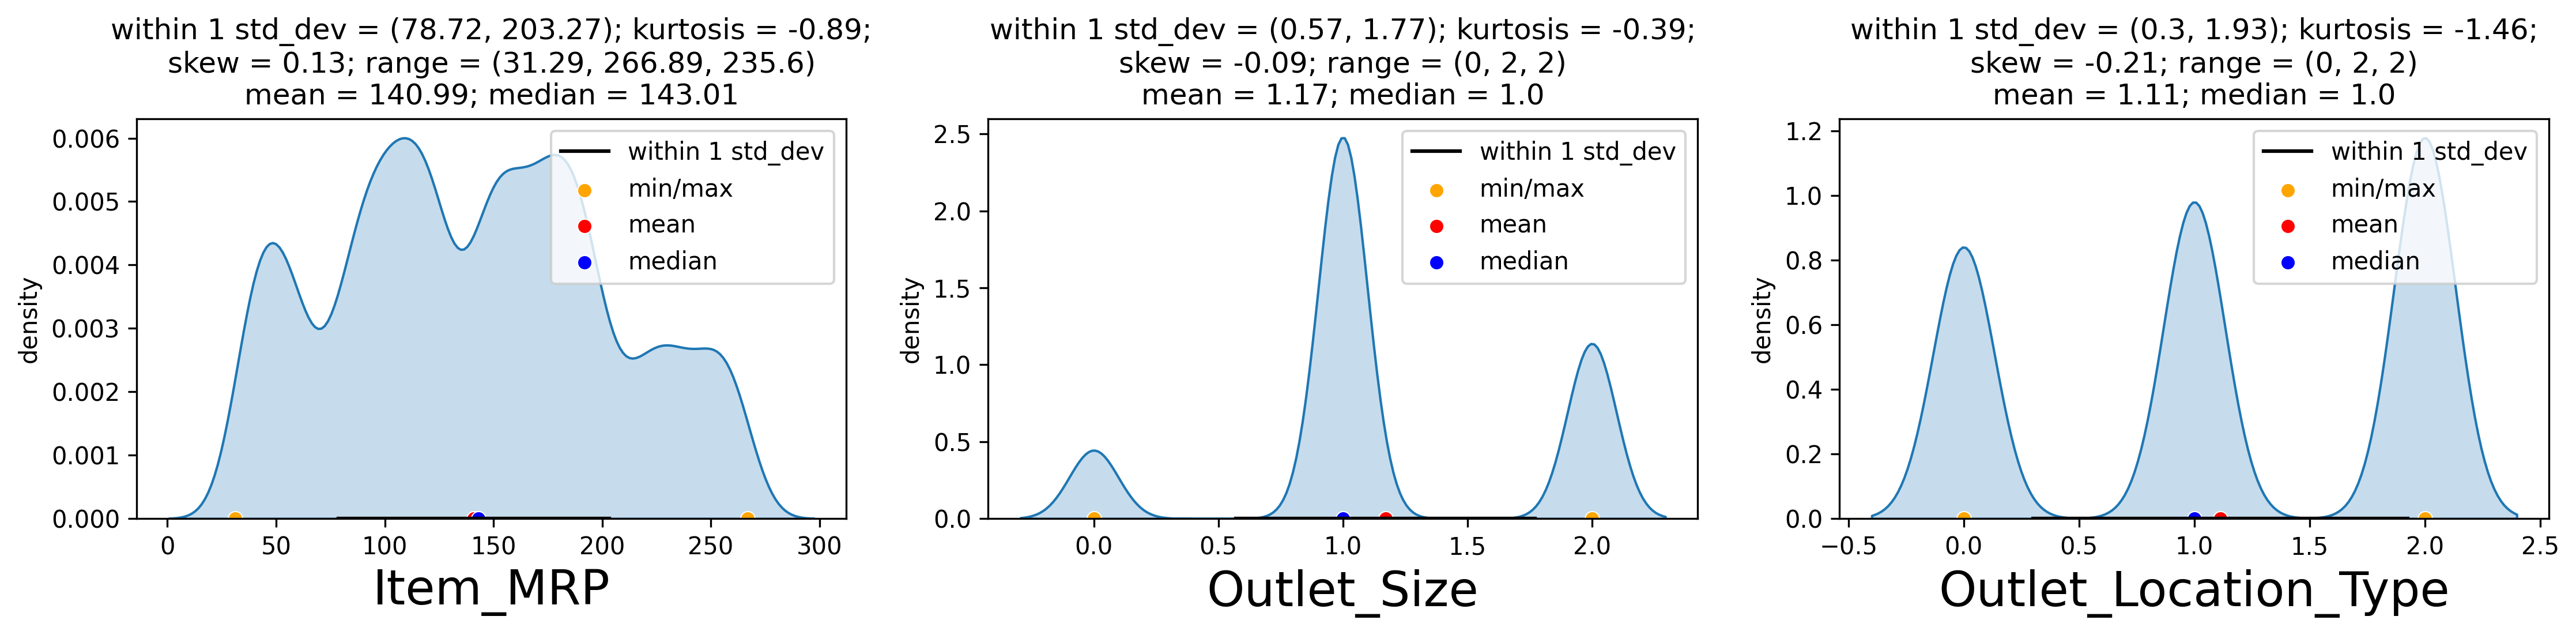

In [903]:
UVA_numeric(df_numerical_columnss_values, numerical_columnss_values[3:6], 6)

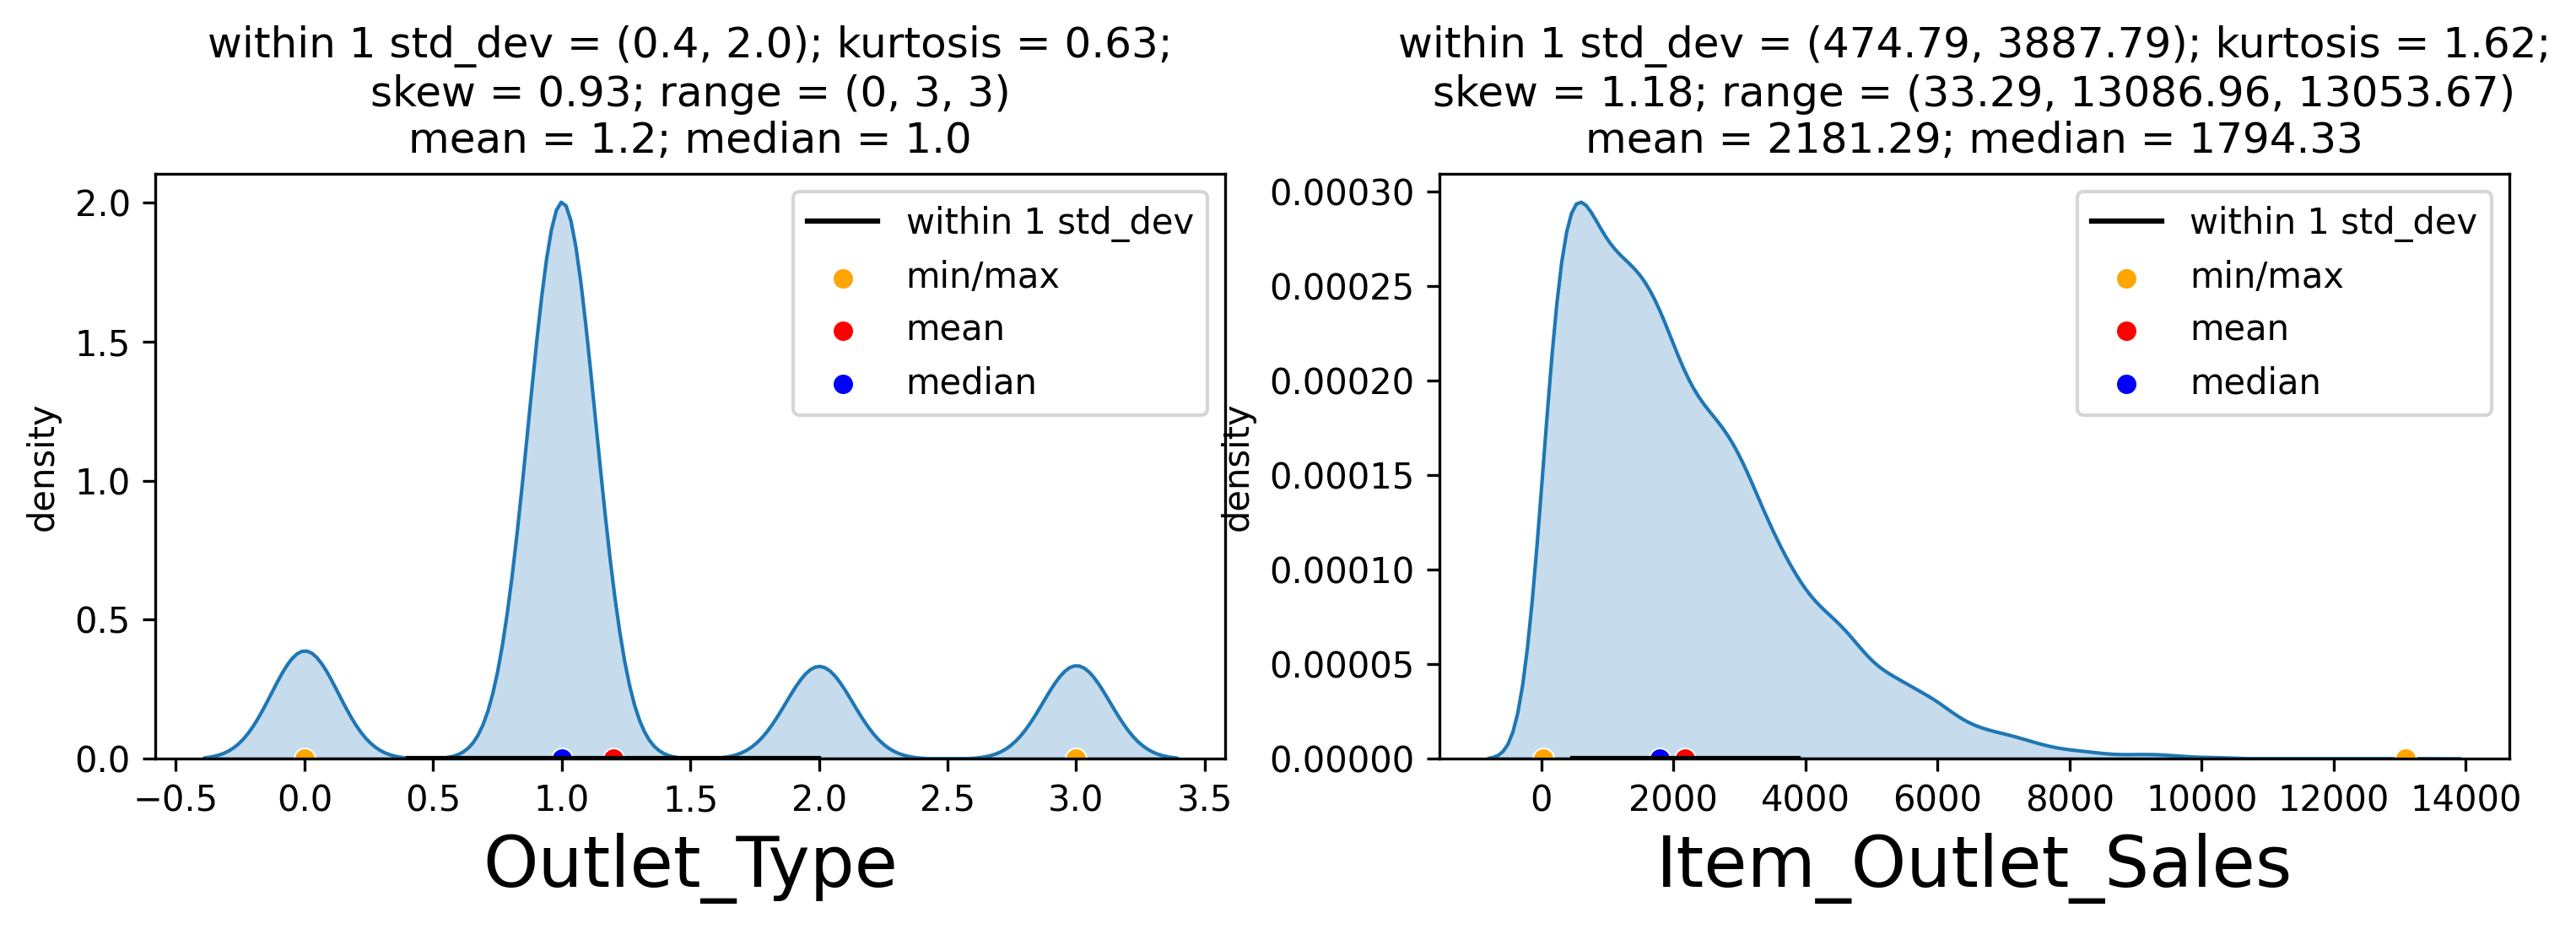

In [904]:
UVA_numeric(df_numerical_columnss_values, numerical_columnss_values[6:9], 6)

### From above we observe that the bias and outliers for the variables in the dataset are in excellent to acceptable range and therefore we can say the variables are normally distributed and **we would not need any outlier removal.**

#### C4-d. Removing outliers from the dataset



In [905]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

#### C4-e. Viewing Value Counts to Understand the Distribution of The Variables in the Dataset.

In [906]:
df_data_column_values =  data.select_dtypes(include=['category', 'int64','float64','Int32'])
data_column_values = df_data_column_values.columns.tolist()
data_column_values

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [907]:
def generate_valuecounts_vargroup(df, numerical_columnss_values):
  #
  rd_data_test = df[numerical_columnss_values]

  # filtering using standard deviation (not considering obseravtions > mean + 3* standard deviation)
  for indices, row in rd_data_test.iterrows():
      for column in numerical_columnss_values:
         print(column+'\n')
         print(rd_data_test[column].value_counts())



In [908]:
#generate_valuecounts_vargroup(data, data_column_values[1:5])

#### C4-f. Mapping Correlations between the Variables

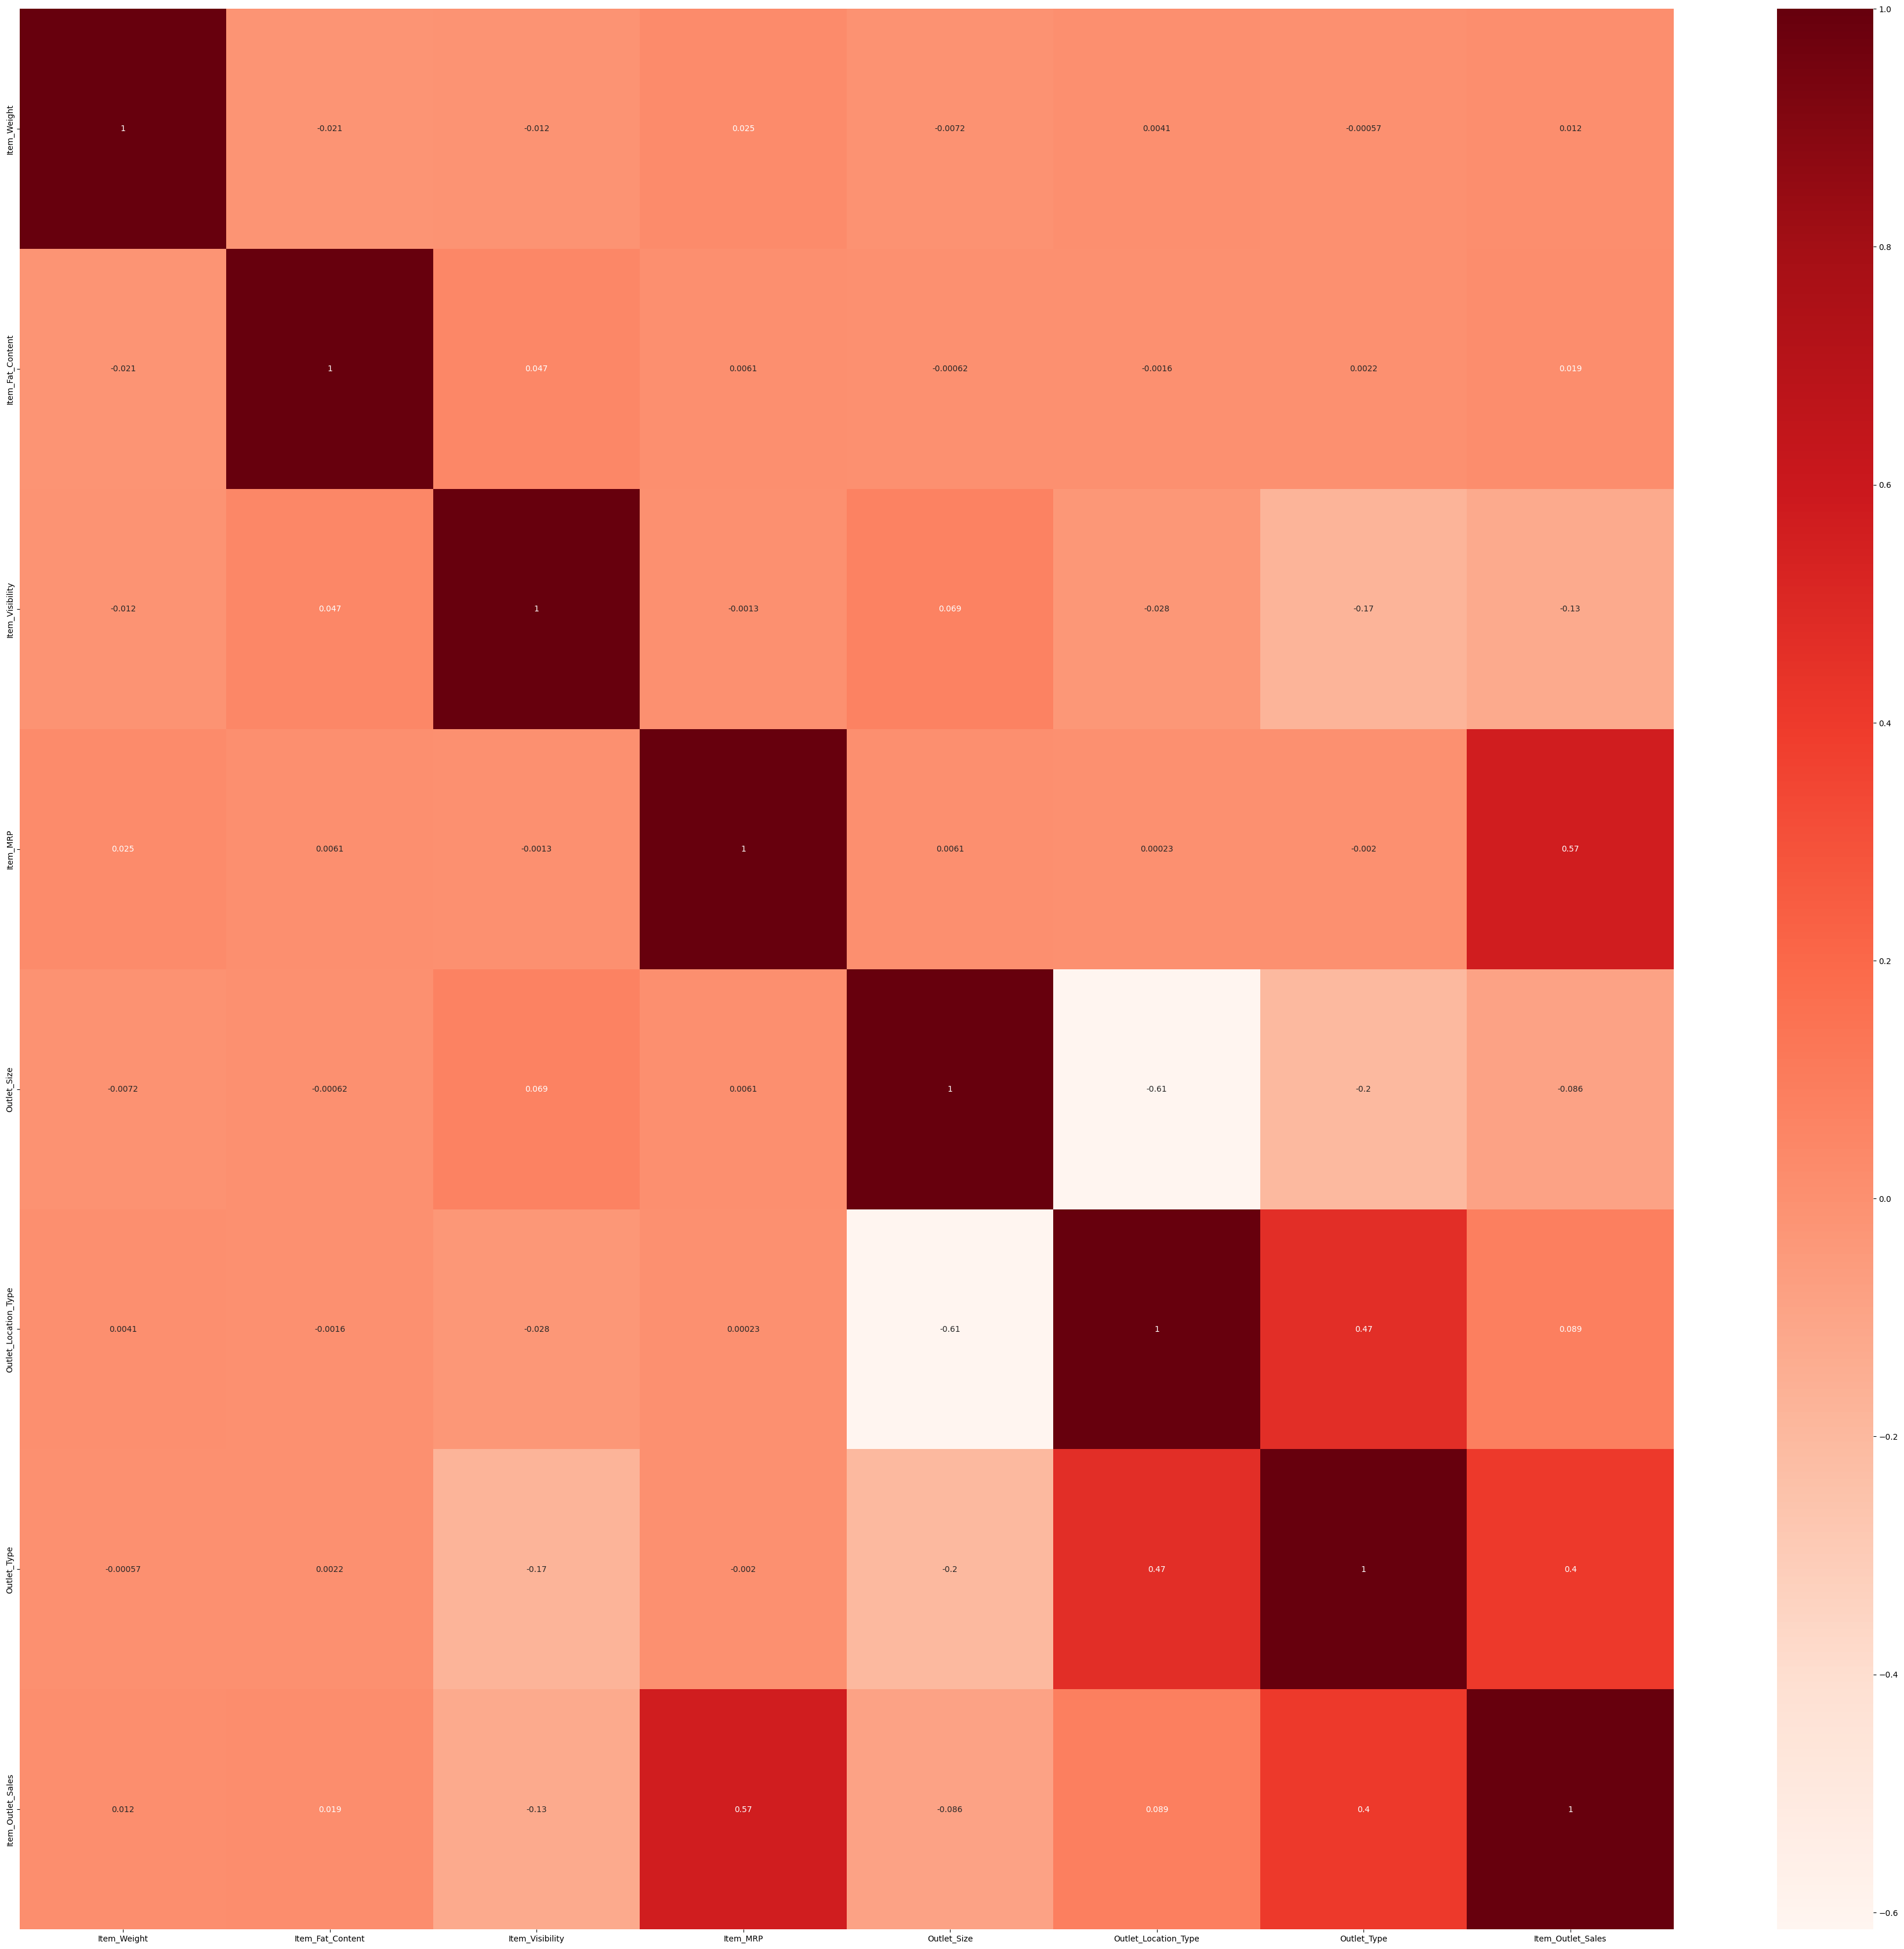

In [909]:
# %matplotlib inline
plt.figure(figsize=(46,43))
cor = df_numerical_columnss_values.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## **D-1. Encoding all the features in the dataset for training a model with ALL features**


In [910]:
df_encoded_all = data.copy()  # Creates a copy of all variables in the input data. It is partially encoded. Some categorica
#

In [911]:
df_encoded_all.dtypes

,0
Item_Identifier,category
Item_Weight,float64
Item_Fat_Content,int64
Item_Visibility,float64
Item_Type,category
Item_MRP,float64
Outlet_Identifier,category
Outlet_Establishment_Year,category
Outlet_Size,int64
Outlet_Location_Type,int64


In [912]:
df_backup_encoded_all = df_encoded_all.copy()


df_encoded_all = df_encoded_all.drop('Item_Identifier', axis=1)

df_encoded_all.select_dtypes(include=['int64','float64','Int32'])[:]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,249.8092,1,0,1,3735.1380
1,5.920,1,0.019278,48.2692,1,2,2,443.4228
2,17.500,0,0.016760,141.6180,1,0,1,2097.2700
3,19.200,1,0.000000,182.0950,1,2,0,732.3800
4,8.930,0,0.000000,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,1,2778.3834
8519,8.380,1,0.046982,108.1570,1,1,1,549.2850
8520,10.600,0,0.035186,85.1224,2,1,1,1193.1136
8521,7.210,1,0.145221,103.1332,1,2,2,1845.5976


In [913]:
df_encoded_bigmart_cat_column_list_all = df_encoded_all.select_dtypes(include=['category']).columns.tolist()

In [914]:
def encode_categories(df_to_encode, df_selected_columns, dataname):
  #Extract categorical columns from the dataframe
  #Here we extract the columns with object datatype as they are the categorical columns
  #categorical_columns = df_to_encode.select_dtypes(include=['category']).columns.tolist()
  #categorical_columns.remove('Item_Identifier')
  #categorical_columns.remove('Outlet_Identifier')
  categorical_columns = df_selected_columns

  #Initialize OneHotEncoder
  encoder = OneHotEncoder(sparse_output=False)

  # Apply one-hot encoding to the categorical columns
  one_hot_encoded = encoder.fit_transform(df_to_encode[categorical_columns])

  #Create a DataFrame with the one-hot encoded columns
  #We use get_feature_names_out() to get the column names for the encoded data
  one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

  # Concatenate the one-hot encoded dataframe with the original dataframe
  df_to_encode = pd.concat([one_hot_df, df_to_encode], axis=1)

  # Drop the original categorical columns
  df_to_encode = df_to_encode.drop(categorical_columns, axis=1)

  # Display the resulting dataframe
  print(f"Encoded ' + dataname + 'data : \n{df_to_encode}")

  #df_to_encode.head()
  return df_to_encode.copy()

In [915]:
df_encoded_all.shape

(8523, 11)

In [916]:
df_encoded_all.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [917]:
df_encoded_bigmart_cat_column_list_all

['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year']

In [918]:
df_encoded_all = encode_categories(df_encoded_all, df_encoded_bigmart_cat_column_list_all, "Bigmart All Features Dataset")

Encoded ' + dataname + 'data : 
      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                        0.0               0.0                  0.0   
1                        0.0               0.0                  0.0   
2                        0.0               0.0                  0.0   
3                        0.0               0.0                  0.0   
4                        0.0               0.0                  0.0   
...                      ...               ...                  ...   
8518                     0.0               0.0                  0.0   
8519                     1.0               0.0                  0.0   
8520                     0.0               0.0                  0.0   
8521                     0.0               0.0                  0.0   
8522                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                  0.0              1.0         

## **E. Now Scaling the Training set Using  Minmax, Standard, and Robust Scaler Techniques**

### E1. Scaling the Data for Normal Distribution

#### By using Normalization all variables are scaled and brought into certain range eith 0 to 1 or -1 t0 1 or column min and max. This helps with efficient model training.

### Below we are using MinMax Scaler, Standard Scalar, and Robust Scalar and  View Density and Distribution.

In [919]:
# For ALL Features
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
minmax_all = scaler.fit_transform(df_encoded_all)
minmax_all = pd.DataFrame(minmax_all, columns=df_encoded_all.columns.tolist())

scaler = preprocessing.StandardScaler()
standard_all = scaler.fit_transform(df_encoded_all)
standard_all = pd.DataFrame(standard_all, columns=df_encoded_all.columns.tolist())

scaler = preprocessing.RobustScaler()
robust_all = scaler.fit_transform(df_encoded_all)
robust_all = pd.DataFrame(robust_all, columns=df_encoded_all.columns.tolist())

display(df_encoded_all.head())
print('*' * 45)
print('\033[1m'+'With minmax scaling:'+'\033[0m')
display(minmax_all.head())
print('*' * 45)
print('\033[1m'+'With standard scaling:'+'\033[0m')
display(standard_all.head())
print('*' * 45 )
print('\033[1m'+'With robust scaling:'+'\033[0m')
display(robust_all.head())

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.30,0,0.016047,249.8092,1,0,1,3735.1380
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.92,1,0.019278,48.2692,1,2,2,443.4228
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17.50,0,0.016760,141.6180,1,0,1,2097.2700
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,19.20,1,0.000000,182.0950,1,2,0,732.3800
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,8.93,0,0.000000,53.8614,0,2,1,994.7052


*********************************************
With minmax scaling:


,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.282525,0.0,0.048866,0.927507,0.5,0.0,0.333333,0.283587
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.081274,1.0,0.058705,0.072068,0.5,1.0,0.666667,0.031419
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.770765,0.0,0.051037,0.468288,0.5,0.0,0.333333,0.158115
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.871986,1.0,0.000000,0.640093,0.5,1.0,0.000000,0.053555
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.260494,0.0,0.000000,0.095805,0.0,1.0,0.333333,0.073651


*********************************************
With standard scaling:


,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.286855,-0.174193,-0.114346,-0.287094,3.390733,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,...,-0.349128,-0.349551,-0.841872,-0.738147,-0.970732,1.747454,-0.284581,-1.369334,-0.252658,0.910601
1,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,...,-0.349128,2.860816,-1.641706,1.354743,-0.908111,-1.489023,-0.284581,1.091569,1.002972,-1.018440
2,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,...,-0.349128,-0.349551,1.098554,-0.738147,-0.956917,0.010040,-0.284581,-1.369334,-0.252658,-0.049238
3,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,2.432698,-0.160484,-0.254903,-0.345735,...,-0.349128,-0.349551,1.500838,1.354743,-1.281758,0.660050,-0.284581,1.091569,-1.508289,-0.849103
4,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,2.892392,...,-0.349128,-0.349551,-0.929428,-0.738147,-1.281758,-1.399220,-1.950437,1.091569,-0.252658,-0.695373


*********************************************
With robust scaling:


,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.531786,0.0,-0.560443,1.163142,0.0,-0.5,0.0,0.856094
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.037017,1.0,-0.512646,-1.031872,0.0,0.5,1.0,-0.595888
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.693924,0.0,-0.549899,-0.015191,0.0,-0.5,0.0,0.133627
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.948035,1.0,-0.797844,0.425652,0.0,0.5,-1.0,-0.468429
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.587092,0.0,-0.797844,-0.970966,-1.0,0.5,0.0,-0.352717


In [920]:
import matplotlib.colors as mcolors
import random

def random_color_generator():
    color = random.choice(list(mcolors.CSS4_COLORS.keys()))
    return color

In [921]:
def plot_kde(df_encoded_scaled, x, scalingstr):
  plt.subplot(1,4,x)
  numerical_columns_values = df_encoded_scaled.columns.tolist()
  for indices, row in df_encoded_scaled.iterrows():
      for column in numerical_columns_values:
          rnd_color = random_color_generator()
          sns.kdeplot(df_encoded_scaled[column], color = rnd_color)
  plt.title(scalingstr)

In [922]:
#plot_kde(df_numerical_columnss_values, 1, 'Without Scaling')

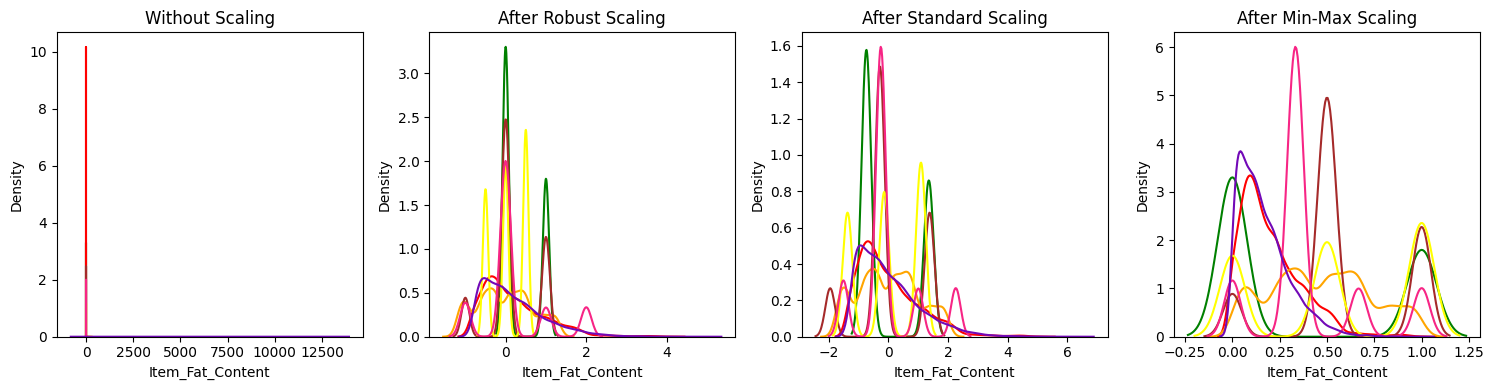

In [923]:
plt.figure(figsize=(15,4))

## Baseline Dataset
plt.subplot(1,4,1)
sns.kdeplot(df_encoded_all['Item_Fat_Content'],  color ='green')
sns.kdeplot(df_encoded_all['Item_Visibility'], color ='red')
sns.kdeplot(df_encoded_all['Item_MRP'],  color ='orange')
sns.kdeplot(df_encoded_all['Outlet_Size'],  color ='brown')
sns.kdeplot(df_encoded_all['Outlet_Location_Type'],  color ='yellow')
sns.kdeplot(df_encoded_all['Outlet_Type'],  color ='#F72585')
sns.kdeplot(df_encoded_all['Item_Outlet_Sales'],  color ='#7209B7')
plt.title('Without Scaling')

plt.subplot(1,4,4)
sns.kdeplot(minmax_all['Item_Fat_Content'],  color ='green')
sns.kdeplot(minmax_all['Item_Visibility'], color ='red')
sns.kdeplot(minmax_all['Item_MRP'],  color ='orange')
sns.kdeplot(minmax_all['Outlet_Size'],  color ='brown')
sns.kdeplot(minmax_all['Outlet_Location_Type'],  color ='yellow')
sns.kdeplot(minmax_all['Outlet_Type'],  color ='#F72585')
sns.kdeplot(minmax_all['Item_Outlet_Sales'],  color ='#7209B7')
plt.title('After Min-Max Scaling')

plt.subplot(1,4,3)
sns.kdeplot(standard_all['Item_Fat_Content'],  color ='green')
sns.kdeplot(standard_all['Item_Visibility'], color ='red')
sns.kdeplot(standard_all['Item_MRP'],  color ='orange')
sns.kdeplot(standard_all['Outlet_Size'],  color ='brown')
sns.kdeplot(standard_all['Outlet_Location_Type'],  color ='yellow')
sns.kdeplot(standard_all['Outlet_Type'],  color ='#F72585')
sns.kdeplot(standard_all['Item_Outlet_Sales'],  color ='#7209B7')
plt.title('After Standard Scaling')

plt.subplot(1,4,2)
sns.kdeplot(robust_all['Item_Fat_Content'],  color ='green')
sns.kdeplot(robust_all['Item_Visibility'], color ='red')
sns.kdeplot(robust_all['Item_MRP'],  color ='orange')
sns.kdeplot(robust_all['Outlet_Size'],  color ='brown')
sns.kdeplot(robust_all['Outlet_Location_Type'],  color ='yellow')
sns.kdeplot(robust_all['Outlet_Type'],  color ='#F72585')
sns.kdeplot(robust_all['Item_Outlet_Sales'],  color ='#7209B7')
plt.title('After Robust Scaling')


plt.tight_layout()
plt.show()

#### **From above we see that some of the variables have outliers present at the hogher end of their distributions. Overall the Min Max Scaler produces a balanced spead and so we will use Min Max Scaled Data for Model Training**

In [924]:
minmax_all

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.282525,0.0,0.048866,0.927507,0.5,0.0,0.333333,0.283587
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.081274,1.0,0.058705,0.072068,0.5,1.0,0.666667,0.031419
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.770765,0.0,0.051037,0.468288,0.5,0.0,0.333333,0.158115
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.871986,1.0,0.000000,0.640093,0.5,1.0,0.000000,0.053555
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.260494,0.0,0.000000,0.095805,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.137541,0.0,0.172914,0.777729,0.0,1.0,0.333333,0.210293
8519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.227746,1.0,0.143069,0.326263,0.5,0.5,0.333333,0.039529
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.359929,0.0,0.107148,0.228492,1.0,0.5,0.333333,0.088850
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.158083,1.0,0.442219,0.304939,0.5,1.0,0.666667,0.138835


In [925]:
minmax_all.columns

Index(['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year

### E2. Model Training, Predictions, And Checking Assumptions.

In [926]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score as r2

#### E3. Segregating variables: Independent and Dependent Variables

In [927]:
#seperating independent and dependent variables
x_6 = minmax_all.drop(['Item_Outlet_Sales'], axis=1)

y = minmax_all['Item_Outlet_Sales']
y_train_a = y
x_6.shape, y.shape

((8523, 42), (8523,))

### E4. Splitting the data into train set and the validation set

In [928]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x_6,val_x_6,train_y,val_y = train_test_split(x_6,y, random_state = 56)

In [929]:
val_x_6.shape

(2131, 42)

In [930]:
val_y.shape

(2131,)

In [931]:
train_x_6.shape

(6392, 42)

In [932]:
train_y.shape

(6392,)

### E5. Implementing Linear Regression and Model Using XGBoost

#### **Setting the Model Learning Rate -aa**

In [933]:
learning_rate = 0.0005

#### **Fitting the Linear Regression Model over the Train Set** - with All Significant Features

In [934]:
# Creating instance of Linear Regresssion -ALL
lr = LR()

# Fitting the model
lr.fit(train_x_6, train_y)

LinearRegression()

In [935]:
train_y.mean()

0.1642970077485156

### E6. Predicting over the **Normalized Train Set** and calculating error using **All features -LR**

In [936]:
# Predicting over the Normalized Train Set and calculating error
train_predict_6 = lr.predict(train_x_6)
k = mae(train_y, train_predict_6)
print('Training Mean Absolute Error', k )
#r = rmse(train_y, train_predict_6)
#print('Training Root Mean Sqaured Error', r )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, train_predict_6)))
s = r2_score(train_y, train_predict_6)
print('Training R2 Score', s )

Training Mean Absolute Error 0.06297834494117917
Root Mean Squared Error: 0.08461788973848651
Training R2 Score 0.5709287225489612


### E7. Comparing the results of LR with a Model using XGBoost

In [937]:
train_x_6.shape

(6392, 42)

#### **Fitting the XGBoost Model Over the Training Set**

In [938]:
train_x_6

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.494352,1.0,0.581665,0.045931,1.0,0.0,0.000000
3644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.800536,0.0,0.047144,0.543596,0.5,0.5,0.333333
3197,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.494352,1.0,0.130787,0.714284,0.5,1.0,1.000000
1791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.494352,0.0,0.246701,0.286710,1.0,0.0,0.000000
2184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.126228,0.0,0.127657,0.259154,1.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.494352,1.0,0.118937,0.529176,0.5,1.0,1.000000
233,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.178327,0.0,0.082721,0.513773,1.0,0.5,0.333333
3264,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.842215,0.0,0.319407,0.382503,0.5,0.5,0.333333
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.262876,0.0,0.283818,0.091281,0.5,0.5,0.333333


In [939]:
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = learning_rate, max_depth = 10, n_estimators = 100)
model.fit(train_x_6, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [940]:
train_predict_6 = model.predict(train_x_6)
result = model.score(train_x_6, train_predict_6)
print("Accuracy : {}".format(result))

Accuracy : 1.0


### E8. Predicting over the **Normalized Train Set** and calculating error using **All features - XGBoost**

In [941]:
k = train_x_6.shape[1]
n = len(train_predict_6)
RMSE = float(format(np.sqrt(mean_squared_error(train_y, train_predict_6)),'.3f'))
MSE = mean_squared_error(train_y, train_predict_6)
MAE = mean_absolute_error(train_y, train_predict_6)
r2 = r2(train_y, train_predict_6)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.125 
MSE = 0.015639718704262152 
MAE = 0.09902603083559106 
R2 = 0.06279628783670987 
Adjusted R2 = 0.05659648378711801


### E9. Predicting over the **Normalized Validation Set** and calculating error using **All Features and LR**.

In [942]:
# Predicting over the Normalized Test Set and calculating error
validation_predict_6 = lr.predict(val_x_6)
k = mae(val_y, validation_predict_6)
print('Validation Mean Absolute Error', k )
# r = rmse(val_y, validation_predict_6)
# print('Validation Root Mean Sqaured Error', r )
s= r2_score(val_y, validation_predict_6)
print('Validation R2 Score', s )

Validation Mean Absolute Error 0.06711094302115943
Validation R2 Score 0.5399847494118716


### E10. Predicting over the **Normalized Validation Set** and calculating error using **All Features and XGBoost**.

In [943]:
val_predict_6 = model.predict(val_x_6)
result_test = model.score(val_x_6, val_predict_6)
print("Accuracy : {}".format(result_test))

Accuracy : 1.0


In [944]:
k = val_x_6.shape[1]
n = len(val_predict_6)
RMSE = float(format(np.sqrt(mean_squared_error(val_y, val_predict_6)),'.3f'))
MSE = mean_squared_error(val_y, val_predict_6)
MAE = mean_absolute_error(val_y, val_predict_6)
r2 = r2_score(val_y, val_predict_6)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.132 
MSE = 0.017319386181523726 
MAE = 0.10210562049151647 
R2 = 0.05300801537865696 
Adjusted R2 = 0.033959326032825365


### E11. Parameters of Linear Regression

In [945]:
lr.coef_

array([-7.87906006e+11, -7.87906006e+11, -7.87906006e+11, -7.87906006e+11,
       -7.87906006e+11, -7.87906006e+11, -7.87906006e+11, -7.87906006e+11,
       -7.87906006e+11, -7.87906006e+11, -7.87906006e+11, -7.87906006e+11,
       -7.87906006e+11, -7.87906006e+11, -7.87906006e+11, -7.87906006e+11,
       -2.50735359e+12,  1.80310274e+12, -3.21452446e+11, -3.20569345e+12,
        4.07892071e+12,  2.19441911e+12, -1.98202004e+12, -2.20786444e+12,
       -1.06494769e+12, -7.97917176e+11, -4.80561895e+12, -3.38166373e+12,
        3.62612946e+10,  8.02118221e+11,  1.97893318e+11,  9.04240752e+11,
        2.49733809e+11, -9.82171246e+11,  8.96481767e+11, -1.34277344e-03,
        2.44140625e-04, -9.86480713e-03,  2.78930664e-01,  8.57325076e+11,
        1.40719967e+12,  9.05964466e+11])

### E11. Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

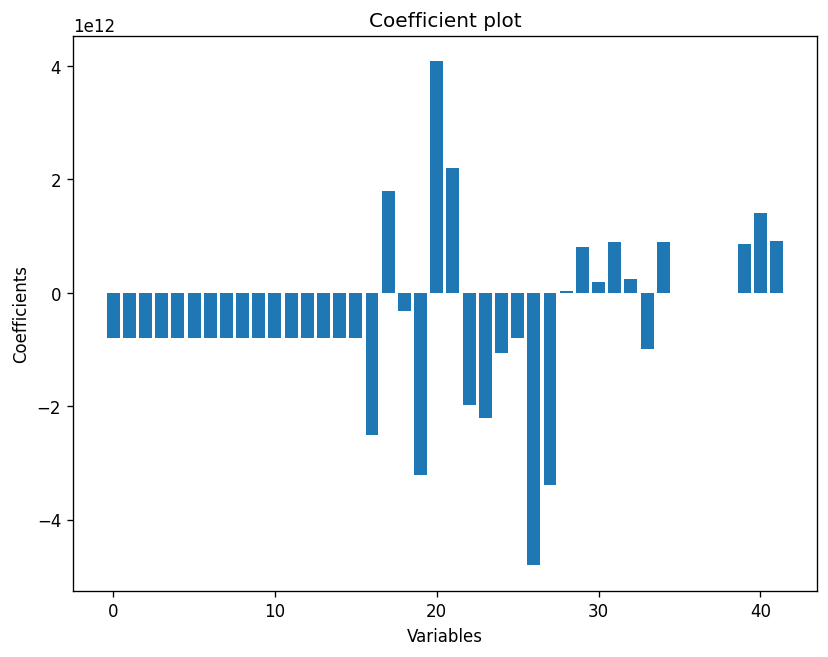

In [946]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x_6.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [947]:
# df_minmax_lr_assumptions_checked_normalized = df_minmax_check_lr_assumptions.copy()

## F. Model Interpretability


### F. Arranging coefficients with features with Normalized Data

In [948]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x_6.columns,
    'coefficient' : lr.coef_
})
Coefficients.head(1601).sort_values(ascending=False, by=['coefficient'])

,Variable,coefficient
20,Outlet_Identifier_OUT019,4.078921e+12
21,Outlet_Identifier_OUT027,2.194419e+12
17,Outlet_Identifier_OUT013,1.803103e+12
40,Outlet_Location_Type,1.407200e+12
41,Outlet_Type,9.059645e+11
31,Outlet_Establishment_Year_2002,9.042408e+11
34,Outlet_Establishment_Year_2009,8.964818e+11
39,Outlet_Size,8.573251e+11
29,Outlet_Establishment_Year_1998,8.021182e+11
32,Outlet_Establishment_Year_2004,2.497338e+11


In [949]:
train_x_6.shape

(6392, 42)

## G. Extracting variables with sigificance

#### **Extracting Features with significance greater than 0.04 (Filtering Significant Features)**

### Using Variance Inflation Factor

In [950]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(train_x_6.values, i) for i in range(train_x_6.shape[1])], index =train_x_6.columns)
VIF

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,0
Item_Type_Baking Goods,inf
Item_Type_Breads,inf
Item_Type_Breakfast,inf
Item_Type_Canned,inf
Item_Type_Dairy,inf
Item_Type_Frozen Foods,inf
Item_Type_Fruits and Vegetables,inf
Item_Type_Hard Drinks,inf
Item_Type_Health and Hygiene,inf
Item_Type_Household,inf


#### Feature with VIF > 5 indicates Multi-colinearity meaning the variable is highly correlated with some other variables in the set. So we should plan to remove multi-colinearity for improving model performance and predictions.

In [951]:
#### Extracting variables with sigificance greater than 5( Filtering Significant Features)
sig_var = Coefficients[Coefficients.coefficient >= 5]

for_export_to_train_model_2 = pd.DataFrame()
VIF = train_x_6[sig_var['Variable'].values].copy()
VIF

,Outlet_Identifier_OUT013,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2009,Outlet_Size,Outlet_Location_Type,Outlet_Type
178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
3644,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.333333
3197,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.000000
1791,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
2184,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.000000
233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.333333
3264,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.333333
399,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.333333


In [952]:
VIF_columns = VIF.columns.tolist()

In [953]:
for_export_to_train_model_2 = train_x_6.drop(VIF_columns, axis=1)

In [954]:
for_export_to_train_model_2

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_2007,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.494352,1.0,0.581665,0.045931
3644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.800536,0.0,0.047144,0.543596
3197,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.494352,1.0,0.130787,0.714284
1791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.494352,0.0,0.246701,0.286710
2184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.126228,0.0,0.127657,0.259154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.494352,1.0,0.118937,0.529176
233,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.178327,0.0,0.082721,0.513773
3264,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.842215,0.0,0.319407,0.382503
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.262876,0.0,0.283818,0.091281


##  Predictions and Evaluation using LR and XGBoost for Dataset with 2 Significant Features.

In [955]:
train_x_2 = for_export_to_train_model_2.copy()

In [956]:
train_y

,Item_Outlet_Sales
178,0.000714
3644,0.155259
3197,0.302458
1791,0.035193
2184,0.181781
...,...
87,0.249158
233,0.196879
3264,0.241457
399,0.076915


In [957]:
val_x_2 = val_x_6.drop(VIF_columns, axis=1)
val_x_2

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_2007,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP
2172,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.461149,1.0,0.541946,0.602082
6228,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.162548,0.0,0.000000,0.525635
2404,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.723132,1.0,0.365838,0.636709
99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.249777,1.0,0.227251,0.664544
4945,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.276273,0.0,0.048285,0.213793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.175945,0.0,0.316767,0.344503
6445,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.245609,0.0,0.026906,0.276948
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.288181,0.0,0.138133,0.222985
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.776719,1.0,0.119436,0.279930


In [958]:
val_y

,Item_Outlet_Sales
2172,0.050903
6228,0.105784
2404,0.233296
99,0.098133
4945,0.104968
...,...
3327,0.151688
6445,0.088034
586,0.048455
1999,0.012241


#### G-2. Training Model  using Features of Significance from the Normalized Data Train Set

In [959]:
# Creating instance of Linear Regresssion with Normalised Data
lr_2 = LR()

# Fitting the model
lr_2.fit(train_x_2, train_y)

LinearRegression()

In [960]:
train_y.mean()

0.1642970077485156

#### G-3. Predicting over the train set using the Normalized Training Data Feature  of Significance Set using LR

In [961]:
# Predicting over the Train Set and calculating error using Normalized Final Seceted Features
train_predict_2 = lr_2.predict(train_x_2)
k = mae(train_y, train_predict_2)
print('Training Mean Absolute Error', k )
# r = rmse(train_y, train_predict_2)
#print('Training Root Mean Sqaured Error', r )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, train_predict_2)))
s = r2_score(train_y, train_predict_2)
print('Training R2 Score', s )

Training Mean Absolute Error 0.07204315868387007
Root Mean Squared Error: 0.0982837111471889
Training R2 Score 0.4211471761273704


In [962]:
train_predict_2

array([0.04759216, 0.19392395, 0.27270508, ..., 0.12576294, 0.05082703,
       0.20697021])

In [963]:
train_predict_2.mean()

0.16430807053968216

#### G-4. Predicting Over Normalized Training Features of Significance Dataset Using the XGBoost Model

In [964]:
model_2 = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = learning_rate, max_depth = 10, n_estimators = 100)
model_2.fit(train_x_2, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [965]:
train_predict_2 = model_2.predict(train_x_2)
result_xgb = model_2.score(train_x_2, train_predict_2)
print("Accuracy : {}".format(result_xgb))

Accuracy : 1.0


In [966]:
k = train_x_2.shape[1]
n = len(train_predict_2)
RMSE = float(format(np.sqrt(mean_squared_error(train_y, train_predict_2)),'.3f'))
MSE = mean_squared_error(train_y, train_predict_2)
MAE = mean_absolute_error(train_y, train_predict_2)
r2 = r2_score(train_y, train_predict_2)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.126 
MSE = 0.015848539847458695 
MAE = 0.0996559838962222 
R2 = 0.050282766699744186 
Adjusted R2 = 0.045803672689524455


### G-5. Predicting over the validation set using the Normalized Significant Feature Validation Data Set Using LR

In [967]:
# Predicting over the Test Set and calculating error using Normalized Final Seceted Features
validation_predict_2 = lr_2.predict(val_x_2)
k = mae(val_y, validation_predict_2)
print('Validation Mean Absolute Error    ', k )
# r = rmse(val_y, validation_predict_2)
# print('Validation Root Mean Sqaured Error', r )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, validation_predict_2)))
s = r2_score(val_y, validation_predict_2)
print('Validation R2 Score', s )

Validation Mean Absolute Error     0.07520720420212035
Root Mean Squared Error: 0.10410476036558006
Validation R2 Score 0.407409090934598


In [968]:
validation_predict_2

array([0.05493164, 0.20036316, 0.22059631, ..., 0.10256958, 0.12667847,
       0.04382324])

### G-6. Predicting Over the Normalized Significant Feature Validation Set Using the XGBoost Model

In [969]:
validation_predict_2 = model_2.predict(val_x_2)
result_validation = model_2.score(val_x_2, validation_predict_2)
print("Accuracy : {}".format(result_validation))

Accuracy : 1.0


In [970]:
k = val_x_2.shape[1]
n = len(validation_predict_2)
RMSE = float(format(np.sqrt(mean_squared_error(val_y, validation_predict_2)),'.3f'))
MSE = mean_squared_error(val_y, validation_predict_2)
MAE = mean_absolute_error(val_y, validation_predict_2)
r2 = r2_score(val_y, validation_predict_2)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.132 
MSE = 0.01753152001904799 
MAE = 0.1027265253800396 
R2 = 0.041408929724180865 
Adjusted R2 = 0.027714771577383446


In [971]:
validation_predict_2

array([0.1579885 , 0.16347831, 0.16798048, ..., 0.16091336, 0.16228667,
       0.15841806], dtype=float32)

### G-7. Plotting the coefficients of LR

Text(0.5, 1.0, 'Normalized Coefficient plot')

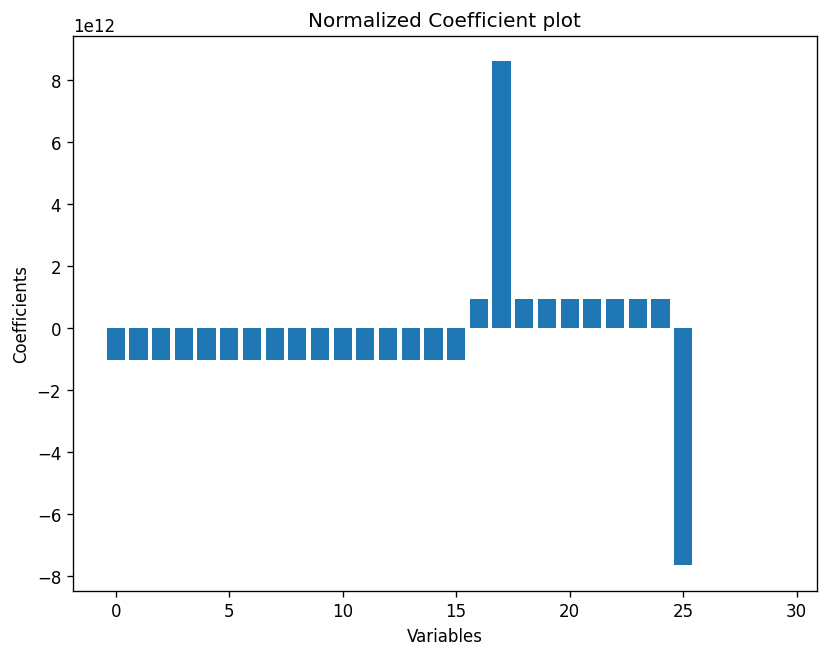

In [972]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x_2.columns))
y = lr_2.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

---------------------------------

## F. Generate a CSV File with Scaled and Normalized Data with Selected Features for Training the Model Using Neural Network

## Exporting Dataset with significant Features For NN Training

### Exporting Dataset ALL Features For NN Training

In [973]:
### Exporting the Normalized ALL features for Model Training.
for_export_to_train_model_6 = pd.DataFrame()
for_export_to_train_model_6 = x_6.copy()
for_export_to_train_model_6.shape

(8523, 42)

In [974]:
for_export_to_train_model_6

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.282525,0.0,0.048866,0.927507,0.5,0.0,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.081274,1.0,0.058705,0.072068,0.5,1.0,0.666667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.770765,0.0,0.051037,0.468288,0.5,0.0,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.871986,1.0,0.000000,0.640093,0.5,1.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.260494,0.0,0.000000,0.095805,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.137541,0.0,0.172914,0.777729,0.0,1.0,0.333333
8519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.227746,1.0,0.143069,0.326263,0.5,0.5,0.333333
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.359929,0.0,0.107148,0.228492,1.0,0.5,0.333333
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.158083,1.0,0.442219,0.304939,0.5,1.0,0.666667


In [975]:
#for_export_to_train_model_6.insert(0, 'Item_Identifier', data['Item_Identifier'])
#for_export_to_train_model_6.insert(1, 'Outet_Identifier', data['Outlet_Identifier'])
#for_export_to_train_model_6.insert(1601, 'Item_Outlet_Sales', df_minmax_check_lr_assumptions['Item_Outlet_Sales'])
for_export_to_train_model_6

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.282525,0.0,0.048866,0.927507,0.5,0.0,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.081274,1.0,0.058705,0.072068,0.5,1.0,0.666667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.770765,0.0,0.051037,0.468288,0.5,0.0,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.871986,1.0,0.000000,0.640093,0.5,1.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.260494,0.0,0.000000,0.095805,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.137541,0.0,0.172914,0.777729,0.0,1.0,0.333333
8519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.227746,1.0,0.143069,0.326263,0.5,0.5,0.333333
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.359929,0.0,0.107148,0.228492,1.0,0.5,0.333333
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.158083,1.0,0.442219,0.304939,0.5,1.0,0.666667


### Exporting Dataset with Features having Significance level> threshold For NN Training

In [976]:
for_export_to_train_model_2

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_2007,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.494352,1.0,0.581665,0.045931
3644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.800536,0.0,0.047144,0.543596
3197,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.494352,1.0,0.130787,0.714284
1791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.494352,0.0,0.246701,0.286710
2184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.126228,0.0,0.127657,0.259154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.494352,1.0,0.118937,0.529176
233,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.178327,0.0,0.082721,0.513773
3264,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.842215,0.0,0.319407,0.382503
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.262876,0.0,0.283818,0.091281


In [977]:
# for_export_to_train_model_2.insert(0, 'Item_Identifier', df_encoded['Item_Identifier'])
# for_export_to_train_model_2.insert(1, 'Outet_Identifier', df_encoded['Outlet_Identifier'])
# for_export_to_train_model_2.insert(47, 'Item_Outlet_Sales', df_minmax_check_lr_assumptions['Item_Outlet_Sales'])
# for_export_to_train_model_2


In [978]:
# Create an export the extracted normalized features for Model Training Using Neural Network. - 6 Features
for_export_to_train_model_6.to_csv('bigmart_outlet_sales_prediction_minmax_data_selected_features_for_model_training_6_features.csv', index=False)

In [979]:
# Create an export the extracted normalized features for Model Training Using Neural Networ.
for_export_to_train_model_2.to_csv('bigmart_outlet_sales_prediction_minmax_data_selected_features_for_model_training_2_features.csv', index=False)

# **Load the Test data file and Preprocess it for Prediction Generation and Evaluation**

In [980]:
# loading the test dataset
data_test = pd.read_csv('/content/sample_data/test_FewQE9B.csv')

#data_test = pd.read_csv('test_FewQE9B.csv')

In [981]:
data_test.shape

(5681, 11)

## 1. Selecting Features to Match the Training Set and Creating a New Subset

### 1-a. Creating a subset with 6 significant features

In [982]:
#seperating independent and dependent variables
#x_t_6 = data_test.drop(['Item_Identifier', 'Item_Weight', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)
x_t_6 = data_test.copy()
x_t_6

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


## 2. Variable Type Identification and Conversion

In [983]:
x_t_6.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [984]:
x_t_6.shape

(5681, 11)

## 2-b. Converting categories to numbers since our model only processes numerical data.

### a. Identifying Unique Values in Categories

In [985]:
# identififying unique category values for the category variables

item_identifier_unique_categories = x_t_6['Item_Identifier'].unique()

In [986]:
item_identifier_unique_categories.shape

(1543,)

In [987]:
x_t_6['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [988]:
item_type_unique_categories = x_t_6['Item_Type'].unique()
item_type_unique_categories.shape

(16,)

In [989]:
outlet_identifier_unique_categories = x_t_6['Outlet_Identifier'].unique()
outlet_identifier_unique_categories.shape

(10,)

In [990]:
outlet_size_unique_categories = x_t_6['Outlet_Size'].unique()
outlet_size_unique_categories.shape

(4,)

In [991]:

outlet_location_type_unique_categories = x_t_6['Outlet_Location_Type'].unique()
outlet_location_type_unique_categories.shape

(3,)

In [992]:
outlet_type_unique_categories = x_t_6['Outlet_Type'].unique()
outlet_type_unique_categories.shape

(4,)

In [993]:
outlet_establishment_year_unique_categories = x_t_6['Outlet_Establishment_Year'].unique()
outlet_establishment_year_unique_categories.shape

(9,)

In [994]:
item_identifier_unique_categories = x_t_6['Item_Identifier'].unique()
item_identifier_unique_categories.shape

(1543,)

In [995]:
x_t_6.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [996]:
# Identifying variables with object datatype
x_t_6.dtypes[x_t_6.dtypes == 'object']

,0
Item_Identifier,object
Item_Fat_Content,object
Item_Type,object
Outlet_Identifier,object
Outlet_Size,object
Outlet_Location_Type,object
Outlet_Type,object


In [997]:
#Converting object data type to category
x_t_6['Item_Identifier'] = x_t_6['Item_Identifier'].astype('category')
x_t_6['Item_Fat_Content'] = x_t_6['Item_Fat_Content'].astype('category')
x_t_6['Item_Type'] = x_t_6['Item_Type'].astype('category')
x_t_6['Outlet_Identifier'] = x_t_6['Outlet_Identifier'].astype('category')
x_t_6['Outlet_Size'] = x_t_6['Outlet_Size'].astype('category')
x_t_6['Outlet_Location_Type'] = x_t_6['Outlet_Location_Type'].astype('category')
x_t_6['Outlet_Type'] = x_t_6['Outlet_Type'].astype('category')


In [998]:
# check the updated datatypes.
x_t_6.dtypes

,0
Item_Identifier,category
Item_Weight,float64
Item_Fat_Content,category
Item_Visibility,float64
Item_Type,category
Item_MRP,float64
Outlet_Identifier,category
Outlet_Establishment_Year,int64
Outlet_Size,category
Outlet_Location_Type,category


In [999]:
# isolating categorical datatypes
categorical = x_t_6.select_dtypes(include=['category'])[:]
categorical.dtypes

,0
Item_Identifier,category
Item_Fat_Content,category
Item_Type,category
Outlet_Identifier,category
Outlet_Size,category
Outlet_Location_Type,category
Outlet_Type,category


### 2-c. Check for missing values

In [1000]:
x_t_6.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [1001]:
x_t_6.dtypes

,0
Item_Identifier,category
Item_Weight,float64
Item_Fat_Content,category
Item_Visibility,float64
Item_Type,category
Item_MRP,float64
Outlet_Identifier,category
Outlet_Establishment_Year,int64
Outlet_Size,category
Outlet_Location_Type,category


### 2-d. Fill the missing values in the Test Data set.

In [1002]:
# filling missing values of continuous variables with mean
x_t_6['Item_Weight'].fillna(x_t_6['Item_Weight'].mean(), inplace=True)

In [1003]:
# filling missing values of categorical variables with mode
x_t_6['Outlet_Size'].fillna(x_t_6['Outlet_Size'].mode()[0], inplace=True)



In [1004]:
x_t_6.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


## 3. Identifying Outliers and Skew in the variables.

In [1005]:
bigmart_numerical_test = x_t_6.select_dtypes(include=['int64','float64','Int32'])[:]
bigmart_details_numerical_test_values = bigmart_numerical_test.columns.tolist()


In [1006]:
bigmart_numerical_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.695633,0.118599,234.2300,1985
...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997
5677,7.600000,0.142991,169.1448,2009
5678,10.000000,0.073529,118.7440,2002
5679,15.300000,0.000000,214.6218,2007


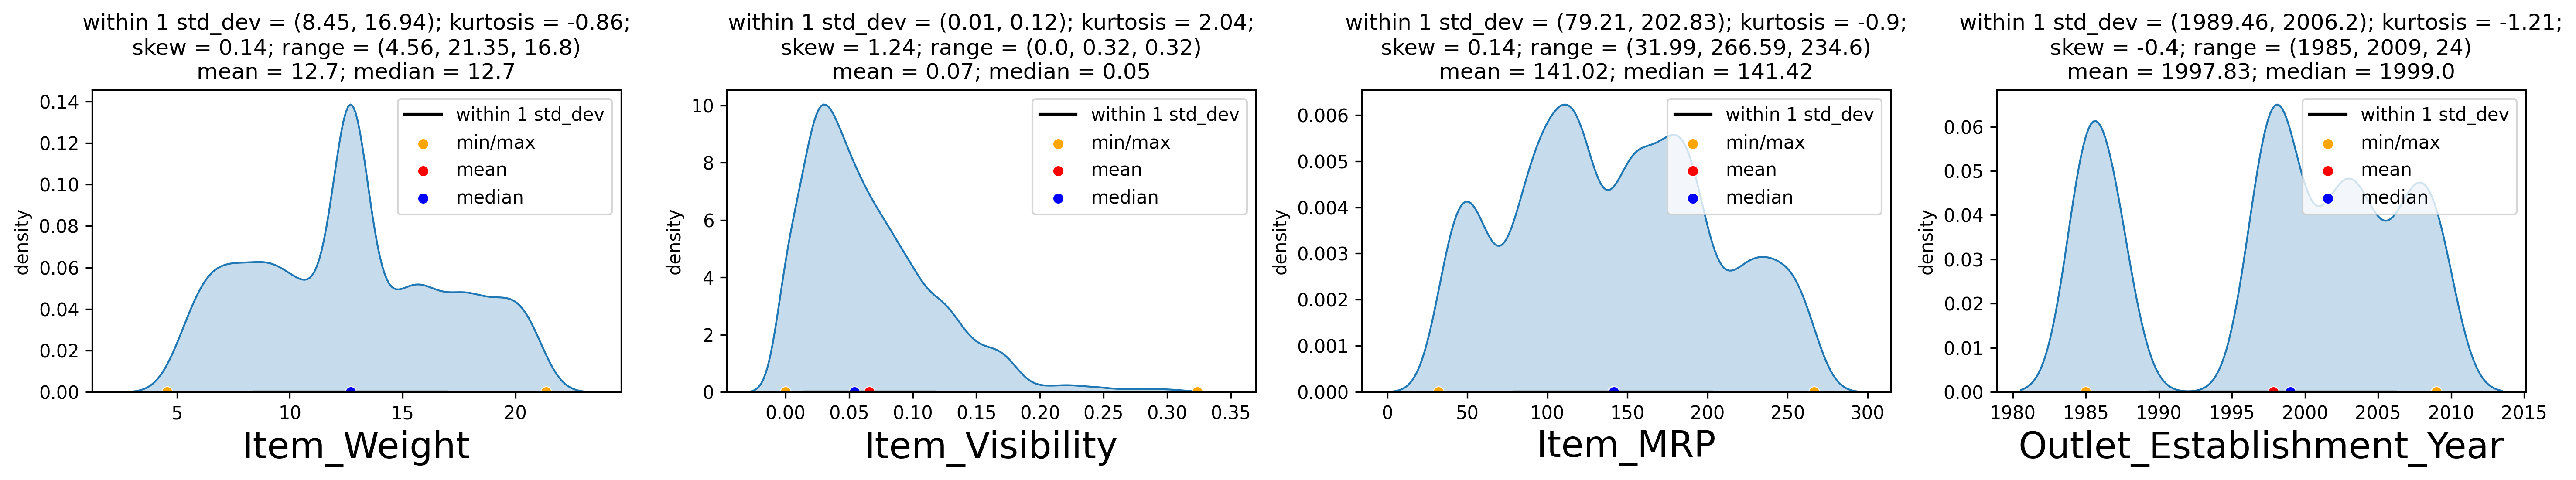

In [1007]:
UVA_numeric(x_t_6, bigmart_details_numerical_test_values[0:4], 6)

### **From above we observe that the bias and the outliers in the test dataset variables are in the excellent to acceptable range for normal distribution. Therefore no outliers need to be removed.**

## 6. Normalizing and Encoding categories

In [1008]:
# # Creating list of unique categories for encoding
# item_fat_unique_cat_list = ['Low Fat', 'Regular']
# outlet_size_unique_cat_list = ['Small', 'Medium', 'High']
# outlet_type_unique_cat_list =['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
# outlet_location_type_unique_cat_list = ['Tier 1', 'Tier 2', 'Tier 3']
# #item_type_unique_cat_list = ['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']
# #outlet_identified_unique_cat_list = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']


In [1009]:
item_fat_content_unique_categories = x_t_6['Item_Type'].unique()
item_fat_content_unique_categories.categories

Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object')

In [1010]:
item_outlet_identifier_unique_categories = x_t_6['Outlet_Identifier'].unique()
item_outlet_identifier_unique_categories.categories

Index(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
       'OUT045', 'OUT046', 'OUT049'],
      dtype='object')

In [1011]:
item_outlet_type_unique_categories = x_t_6['Outlet_Type'].unique()
item_outlet_type_unique_categories

['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2']
Categories (4, object): ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
                         'Supermarket Type3']

In [1012]:
item_outlet_established_year_unique_categories = x_t_6['Outlet_Establishment_Year'].unique()
item_outlet_established_year_unique_categories

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004])

In [1013]:
# Normalizing categories
x_t_6['Item_Fat_Content'] = x_t_6['Item_Fat_Content'].map({'LF':'Low Fat', 'low fat': 'Low Fat', 'Low Fat':'Low Fat','reg':'Regular', 'Regular':'Regular'})

In [1014]:
x_t_6['Item_Fat_Content'] = x_t_6['Item_Fat_Content'].astype('category')

In [1015]:
x_t_6['Item_Fat_Content']

,Item_Fat_Content
0,Low Fat
1,Regular
2,Low Fat
3,Low Fat
4,Regular
...,...
5676,Regular
5677,Regular
5678,Low Fat
5679,Regular


In [1016]:
x_t_6['Outlet_Establishment_Year'].value_counts()

,count
Outlet_Establishment_Year,
1985,976
1987,621
1999,620
1997,620
2004,620
2002,619
2009,618
2007,617
1998,370


In [1017]:
x_t_6.dtypes

,0
Item_Identifier,category
Item_Weight,float64
Item_Fat_Content,category
Item_Visibility,float64
Item_Type,category
Item_MRP,float64
Outlet_Identifier,category
Outlet_Establishment_Year,int64
Outlet_Size,category
Outlet_Location_Type,category


#### 6-a. Normalizing Variables and Label Encoding

In [1018]:
# converting the categories into numbers using map function
lblencoder = LabelEncoder()
ohencoder = OneHotEncoder()


x_t_6['Item_Fat_Content'] = lblencoder.fit_transform(x_t_6['Item_Fat_Content'])

x_t_6['Outlet_Size'] = lblencoder.fit_transform(x_t_6['Outlet_Size'])

x_t_6['Outlet_Type'] = lblencoder.fit_transform(x_t_6['Outlet_Type'])

x_t_6['Outlet_Location_Type'] = lblencoder.fit_transform(x_t_6['Outlet_Location_Type'])


In [1019]:
x_t_6.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,1,1
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,2,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,1
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,3


In [1020]:
x_t_6.dtypes

,0
Item_Identifier,category
Item_Weight,float64
Item_Fat_Content,int64
Item_Visibility,float64
Item_Type,category
Item_MRP,float64
Outlet_Identifier,category
Outlet_Establishment_Year,int64
Outlet_Size,int64
Outlet_Location_Type,int64


In [1021]:
x_t_6.shape

(5681, 11)

In [1022]:
# Drop the Item_Identifier to match the Training ste used to fit the model.
x_t_6 = x_t_6.drop('Item_Identifier', axis=1)
#x_t_6 = x_t_6.drop('Outlet_Identifier', axis=1)

In [1023]:
x_t_6.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

#### 6-b. One Hot Encoding - convert categorical values to numerical

In [1024]:
x_t_6['Outlet_Establishment_Year'] = x_t_6['Outlet_Establishment_Year'].astype('category')

In [1025]:
test_categorical_columns_all = x_t_6.select_dtypes(include=['category']).columns.tolist()

In [1026]:
test_categorical_columns_all

['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year']

In [1027]:
df_test_encoded_all = encode_categories(x_t_6, test_categorical_columns_all, "Bigmart All Features Test Dataset")

Encoded ' + dataname + 'data : 
      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                        0.0               0.0                  0.0   
1                        0.0               0.0                  0.0   
2                        0.0               0.0                  0.0   
3                        0.0               0.0                  0.0   
4                        0.0               0.0                  0.0   
...                      ...               ...                  ...   
5676                     0.0               0.0                  0.0   
5677                     0.0               0.0                  0.0   
5678                     0.0               0.0                  0.0   
5679                     0.0               0.0                  0.0   
5680                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                  0.0              0.0         

### Checking if there are any remaining null values.

In [1028]:
df_test_encoded_all.isnull().sum()

,0
Item_Type_Baking Goods,0
Item_Type_Breads,0
Item_Type_Breakfast,0
Item_Type_Canned,0
Item_Type_Dairy,0
Item_Type_Frozen Foods,0
Item_Type_Fruits and Vegetables,0
Item_Type_Hard Drinks,0
Item_Type_Health and Hygiene,0
Item_Type_Household,0


### 6-c. Isolating numerical datatypes

In [1029]:
# Isolating numerical types for analysis
bigmart_numerical = df_test_encoded_all.select_dtypes(include=['int64','float64','Int32'])[:]
bigmart_details_numerical_values = bigmart_numerical.columns.tolist()


In [1030]:
# Item_Identfier List - segregating numerica variables in ggroups for convinience, faster compute, and analysis.
bigmart_details_numerical_values_1_16 = bigmart_numerical.columns[:16].tolist()
bigmart_details_numerical_values_1_16

['Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods']

In [1031]:
# Outlet_Identifier List -segregating numerica variables in ggroups for convinience, faster compute, and analysis.
bigmart_details_numerical_values_16_26 = bigmart_numerical.columns[16:26].tolist()
bigmart_details_numerical_values_16_26

['Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT049']

In [1032]:
# Item_Type List-segregating numerica variables in ggroups for convinience, faster compute, and analysis.
bigmart_details_numerical_values_1575_1585 = bigmart_numerical.columns[26:38].tolist()
bigmart_details_numerical_values_1575_1585

['Outlet_Establishment_Year_1985',
 'Outlet_Establishment_Year_1987',
 'Outlet_Establishment_Year_1997',
 'Outlet_Establishment_Year_1998',
 'Outlet_Establishment_Year_1999',
 'Outlet_Establishment_Year_2002',
 'Outlet_Establishment_Year_2004',
 'Outlet_Establishment_Year_2007',
 'Outlet_Establishment_Year_2009',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility']

In [1033]:
# Outlet_Establishment Year List -segregating numerica variables in ggroups for convinience, faster compute, and analysis.
bigmart_details_numerical_values_1585_1594 = bigmart_numerical.columns[1585:1594].tolist()
#bigmart_details_numerical_values_1585_1594

In [1034]:
# Outlet_Establishment Year List -segregating numerica variables in ggroups for convinience, faster compute, and analysis.
bigmart_details_numerical_values_1594_1602 = bigmart_numerical.columns[1594:1602].tolist()
#bigmart_details_numerical_values_1594_1602

In [1035]:
# x_t_6['Item_Fat_Content'] = x_t_6['Item_Fat_Content'].astype('category')
# x_t_6['Outlet_Size'] = x_t_6['Outlet_Size'].astype('category')
# x_t_6['Outlet_Location_Type'] = x_t_6['Outlet_Location_Type'].astype('category')
# x_t_6['Outlet_Type'] = x_t_6['Outlet_Type'].astype('category')


## 7. Selecting Features to Match the Train Data Set

In [1036]:
len(df_test_encoded_all)

5681

In [1037]:
df_test_encoded_all.describe()

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,0.077099,0.029044,0.013378,0.076571,0.079916,0.100334,0.137476,0.026052,0.059497,0.112304,...,0.109136,0.108608,0.108784,12.695633,0.354339,0.065684,141.023273,1.170921,1.112832,1.201373
std,0.266772,0.167945,0.114897,0.265933,0.271186,0.300472,0.344379,0.159303,0.236573,0.315768,...,0.311837,0.311174,0.311395,4.245189,0.478355,0.051252,61.809091,0.600328,0.812824,0.796740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.555000,0.000000,0.000000,31.990000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.195000,0.000000,0.027047,94.412000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,12.695633,0.000000,0.054154,141.415400,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.850000,1.000000,0.093463,186.026600,2.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,21.350000,1.000000,0.323637,266.588400,2.000000,2.000000,3.000000


## 7. Scaling Test Data

In [1038]:
scaler = preprocessing.MinMaxScaler()
minmax_t = scaler.fit_transform(df_test_encoded_all)
minmax_t = pd.DataFrame(minmax_t, columns=df_test_encoded_all.columns.to_list())

scaler = preprocessing.StandardScaler()
standard_t = scaler.fit_transform(df_test_encoded_all)
standard_t = pd.DataFrame(standard_t, columns=df_test_encoded_all.columns.to_list())

scaler = preprocessing.RobustScaler()
robust_t = scaler.fit_transform(df_test_encoded_all)
robust_t = pd.DataFrame(robust_t, columns=df_test_encoded_all.columns.to_list())

In [1039]:
minmax_all.shape

(8523, 43)

In [1040]:
minmax_t.head()

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.964275,0.0,0.023374,0.323413,0.5,0.0,0.333333
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.222983,1.0,0.118737,0.235849,0.5,0.5,0.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.598095,0.0,0.307674,0.894140,0.5,1.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.164335,0.0,0.047548,0.524488,0.5,0.5,0.333333
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.484706,1.0,0.366458,0.862069,0.5,1.0,1.000000


In [1041]:
minmax_t.shape

(5681, 42)

In [1042]:
print('*' * 45)
print('\033[1m'+'With minmax scaling:'+'\033[0m')
display(minmax_t.head())
print('*' * 45)
print('\033[1m'+'With standard scaling:'+'\033[0m')
display(standard_t.head())
print('*' * 45 )
print('\033[1m'+'With robust scaling:'+'\033[0m')
display(robust_t.head())

*********************************************
With minmax scaling:


,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.964275,0.0,0.023374,0.323413,0.5,0.0,0.333333
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.222983,1.0,0.118737,0.235849,0.5,0.5,0.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.598095,0.0,0.307674,0.894140,0.5,1.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.164335,0.0,0.047548,0.524488,0.5,0.5,0.333333
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.484706,1.0,0.366458,0.862069,0.5,1.0,1.000000


*********************************************
With standard scaling:


,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.289033,-0.172954,-0.116445,-0.287959,-0.294715,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,...,-0.350008,-0.349057,-0.349374,1.897460e+00,-0.740811,-1.134077,-0.536555,-0.284737,-1.369215,-0.252769
1,-0.289033,-0.172954,-0.116445,-0.287959,3.393113,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,...,-0.350008,2.864866,-0.349374,-1.035530e+00,1.349873,-0.531850,-0.868937,-0.284737,-0.138827,-0.252769
2,-0.289033,-0.172954,-0.116445,-0.287959,-0.294715,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,...,-0.350008,-0.349057,-0.349374,4.486336e-01,-0.740811,0.661316,1.629848,-0.284737,1.091560,-1.507994
3,-0.289033,-0.172954,-0.116445,-0.287959,-0.294715,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,...,-0.350008,2.864866,-0.349374,-1.267578e+00,-0.740811,-0.981416,0.226697,-0.284737,-0.138827,-0.252769
4,-0.289033,-0.172954,-0.116445,-0.287959,3.393113,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,...,-0.350008,-0.349057,-0.349374,4.184768e-16,1.349873,1.032540,1.508110,-0.284737,1.091560,2.257683


*********************************************
With robust scaling:


,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.210273,0.0,-0.701481,-0.366243,0.0,-0.5,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.660501,1.0,-0.236790,-0.590469,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.286156,0.0,0.683884,1.095223,0.0,0.5,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.808510,0.0,-0.583685,0.148651,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,1.0,0.970328,1.013098,0.0,0.5,2.0


In [1043]:
minmax_all.shape

(8523, 43)

### 7-b. Segregating the Independent and Dependent Variables

In [1044]:
# Scaled
minmax_t_X = minmax_t

## 8.Predicting over the Normalized Test Set and Calculating Errors Using LR.

### 8-a.Predictions for Test Dataset with All Features using Linear Regression

In [1045]:
test_predict_6 = lr.predict(minmax_t_X)  # We are using the previously fitted model to predict target values for the test dataset using training set with all features.

In [1046]:
test_predict_6.shape

(5681,)

In [1047]:
test_predict_6.mean()

0.16431755625935135

In [1048]:
train_y.shape

(6392,)

In [1049]:
train_y_sh = train_y.head(5681)

In [1050]:
train_y_sh.shape   # From the previous spit of the Train set.

(5681,)

In [1051]:
k = mae(train_y_sh, test_predict_6)
print('Test Mean Absolute Error    ', k )
# r = rmse(train_y, test_predict_6_sh)
# print('Test Root Mean Sqaured Error', r )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y_sh, test_predict_6)))
s = r2_score(train_y_sh, test_predict_6)
print('Test R2 Score', s ) # R2 Score Indicates the strenght of relationship between the dependent and the independent variables. Higher scores indicate good fit with the data.
# It is the % of variance in the dependent variable is explained by the independent variables

Test Mean Absolute Error     0.1278423066099372
Root Mean Squared Error: 0.1613450605731818
Test R2 Score -0.5561919388693397


#### Note: _ve values of R2 score indicate the model average values perform better thna the predicted values.

### 8-b. Predicting Over the Normalized and Scaled Features Test Set Using the XGBoost Model - All Features

In [1052]:
test_predict_t_6 = model.predict(minmax_t_X)
result_validation = model.score(minmax_t_X, test_predict_6)
print("Accuracy : {}".format(result_validation))

Accuracy : 0.09334759991515929


In [1053]:
test_predict_t_6.shape

(5681,)

In [1054]:
train_y.shape

(6392,)

In [1055]:
y_train_a.shape

(8523,)

In [1056]:
y_train_a_mean = y_train_a.mean()
y_train_a_mean

0.16455128126640875

In [1057]:
y_train_a_sh = y_train_a.head(5681)

In [1058]:
k = minmax_t.shape[1]
n = len(test_predict_t_6)
RMSE = float(format(np.sqrt(mean_squared_error(y_train_a_sh, test_predict_t_6)),'.3f'))
MSE = mean_squared_error(y_train_a_sh, test_predict_t_6)
MAE = mean_absolute_error(y_train_a_sh, test_predict_t_6)
r2 = r2_score(y_train_a_sh, test_predict_t_6)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.131 
MSE = 0.017056962370391743 
MAE = 0.10279669853931597 
R2 = -0.0025676228869460083 
Adjusted R2 = -0.010036200425302066


In [1059]:
test_predict_t_6_mean = test_predict_t_6.mean()
test_predict_t_6_mean

0.16422653

#### Negative R2 indicates that the mean value of the target variable in the training set performs better than the predicted model value. The target variable mean i.e y_train_a_mean is 0.16455128126640875.

In [1060]:
test_predict_t_6

array([0.16209625, 0.1610734 , 0.15832025, ..., 0.16198257, 0.17331576,
       0.1610734 ], dtype=float32)

### 8-b. Predicting Over the Normalized Features Test Set Using the LR Model - Features of Significance

In [1061]:
test_x_2 = pd.DataFrame


In [1062]:
# test_x_2.drop(['Item_Fat_Content', 'Item_Visibility', 'Outlet_Size', 'Outlet_Location_Type'], axis=1, inplace=True)

In [1063]:
test_x_2 = minmax_t_X.drop(VIF_columns, axis=1)

In [1064]:
test_x_2.columns

Index(['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Establishment_Year_1985',
       'Outlet_Establishment_Year_1987', 'Outlet_Establishment_Year_2007',
       'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP'],
      dtype='object')

In [1065]:
test_predict_lr_2 = lr_2.predict(test_x_2)  # We are using the previously fitted model to predict target values for the test dataset using training set with two features.

In [1066]:
test_predict_lr_2.mean()

0.1638754354650507

In [1067]:
test_predict_lr_2.shape

(5681,)

In [1068]:
y.shape

(30,)

In [1069]:
k = mae(y_train_a_sh, test_predict_lr_2)
print('Test Mean Absolute Error    ', k )
#r = rmse(y_train_a, test_predict_lr_2)
# print('Test Root Mean Sqaured Error', r )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_a_sh, test_predict_lr_2)))
s = r2_score(y_train_a_sh, test_predict_lr_2)
print('Test R2 Score', s ) # R2 Score Indicates the strenght of relationship between the dependent and the independent variables. Higher scores indicate good fit with the data.
# It is the % of variance in the dependent variable is explained by the independent variables

Test Mean Absolute Error     0.12248642228048164
Root Mean Squared Error: 0.15649191351304714
Test R2 Score -0.4394473543883126


### 8-c. Predicting Over the Normalized Features Test Set Using the XGBoost Model - 2 Features

In [1070]:
test_predict_t_2 = model_2.predict(test_x_2)
result_validation = model_2.score(test_x_2, test_predict_t_2)
print("Accuracy : {}".format(result_validation))

Accuracy : 1.0


In [1071]:
k = test_x_2.shape[1]
n = len(test_predict_t_2)
RMSE = float(format(np.sqrt(mean_squared_error(y_train_a_sh, test_predict_t_2)),'.3f'))
MSE = mean_squared_error(y_train_a_sh, test_predict_t_2)
MAE = mean_absolute_error(y_train_a_sh, test_predict_t_2)
r2 = r2_score(y_train_a_sh, test_predict_t_2)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.131 
MSE = 0.01704826743318137 
MAE = 0.10279519278942896 
R2 = -0.002056555186797704 
Adjusted R2 = -0.007377209462125833


In [1072]:
test_predict_t_2

array([0.16228667, 0.16091336, 0.1579885 , ..., 0.16314016, 0.16955909,
       0.16091336], dtype=float32)

In [1073]:
test_predict_t_2.mean()

0.16428071

In [1074]:
df_test_predict= pd.DataFrame()
df_test_predict['Item_Outlet_Sales']= test_predict_t_6
df_test_predict

,Item_Outlet_Sales
0,0.162096
1,0.161073
2,0.158320
3,0.165083
4,0.180666
...,...
5676,0.164491
5677,0.165898
5678,0.161983
5679,0.173316


## Export The Scaled and Normalized Test Data Using MinMax Scaler to Generate Item Outlet Sales Predictions using Neural Network.

In [1075]:
minmax_t

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.964275,0.0,0.023374,0.323413,0.5,0.0,0.333333
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.222983,1.0,0.118737,0.235849,0.5,0.5,0.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.598095,0.0,0.307674,0.894140,0.5,1.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.164335,0.0,0.047548,0.524488,0.5,0.5,0.333333
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.484706,1.0,0.366458,0.862069,0.5,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.353974,1.0,0.041702,0.466011,1.0,0.0,0.333333
5677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.181304,1.0,0.441825,0.584637,0.5,1.0,0.666667
5678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.324204,0.0,0.227194,0.369798,0.5,0.5,0.333333
5679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.639774,1.0,0.000000,0.778487,0.5,0.5,0.333333


In [1076]:
minmax_t.shape

(5681, 42)

In [1077]:
test_x_2.shape

(5681, 30)

In [1078]:
data_test.shape

(5681, 11)

In [1079]:
#minmax_t.insert(42, 'Item_Outlet_Sales', test_predict_t_6)

### Preparing The Evaluation Test Data Set for the Neural Network Model

In [1080]:
 minmax_t.insert(0, 'Item_Identifier', data_test['Item_Identifier'])
 minmax_t.insert(1, 'Outlet_Identifier', data_test['Outlet_Identifier'])
 minmax_t.insert(42, 'Item_Outlet_Sales_Actual', data['Item_Outlet_Sales'])

 test_x_2.insert(0, 'Item_Identifier', data_test['Item_Identifier'])
 test_x_2.insert(1, 'Outlet_Identifier', data_test['Outlet_Identifier'])
 test_x_2.insert(30, 'Item_Outlet_Sales_Actual', data['Item_Outlet_Sales'])


In [1081]:
minmax_t.to_csv('bigmart_outlet_sales_test_data_selected_features_for_modelevaluation_all_features.csv', index=False)
test_x_2.to_csv('bigmart_outlet_sales_test_data_selected_features_for_modelevaluation_significant_features.csv', index=False)

# **Model Training using Neural Network using Keras**

## Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [1082]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [1083]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.3.2


In [1084]:
# loading the pre-processed dataset
data_t = pd.read_csv('/content/bigmart_outlet_sales_test_data_selected_features_for_modelevaluation_all_features.csv')
#data_t = pd.read_csv('bigmart_outlet_sales_test_data_selected_features_for_modelevaluation_all_features.csv')

In [1085]:
# looking at the first five rows of the dataset
data_t.head()

,Item_Identifier,Outlet_Identifier,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales_Actual,Outlet_Location_Type,Outlet_Type
0,FDW58,OUT049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.964275,0.0,0.023374,0.323413,0.5,3735.1380,0.0,0.333333
1,FDW14,OUT017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.222983,1.0,0.118737,0.235849,0.5,443.4228,0.5,0.333333
2,NCN55,OUT010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.598095,0.0,0.307674,0.894140,0.5,2097.2700,1.0,0.000000
3,FDQ58,OUT017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.164335,0.0,0.047548,0.524488,0.5,732.3800,0.5,0.333333
4,FDY38,OUT027,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.484706,1.0,0.366458,0.862069,0.5,994.7052,1.0,1.000000


In [1086]:
# checking missing values
data_t.isnull().sum()

,0
Item_Identifier,0
Outlet_Identifier,0
Item_Type_Baking Goods,0
Item_Type_Breads,0
Item_Type_Breakfast,0
Item_Type_Canned,0
Item_Type_Dairy,0
Item_Type_Frozen Foods,0
Item_Type_Fruits and Vegetables,0
Item_Type_Hard Drinks,0


In [1087]:
# checking the data type
data_t.dtypes

,0
Item_Identifier,object
Outlet_Identifier,object
Item_Type_Baking Goods,float64
Item_Type_Breads,float64
Item_Type_Breakfast,float64
Item_Type_Canned,float64
Item_Type_Dairy,float64
Item_Type_Frozen Foods,float64
Item_Type_Fruits and Vegetables,float64
Item_Type_Hard Drinks,float64


In [1088]:
# looking at the shape of the data
data_t.shape

(5681, 45)

In [1089]:
# backing up the Item_Identifier and Outlet_Identifier
df_backup_train_t = pd.DataFrame()
df_backup_train_t = data_t.copy()
#df_backup_train['Outlet_Identifier'] = data['Outlet_Identifier'].copy()
data_t.drop('Item_Identifier', axis=1, inplace=True)
data_t.drop('Outlet_Identifier', axis=1, inplace=True)

In [1090]:
data_t.shape

(5681, 43)

In [1091]:
data_t.dtypes

,0
Item_Type_Baking Goods,float64
Item_Type_Breads,float64
Item_Type_Breakfast,float64
Item_Type_Canned,float64
Item_Type_Dairy,float64
Item_Type_Frozen Foods,float64
Item_Type_Fruits and Vegetables,float64
Item_Type_Hard Drinks,float64
Item_Type_Health and Hygiene,float64
Item_Type_Household,float64


In [1092]:
#data['Item_Outlet_Sales']

In [1093]:
# separating the independent and dependent variables

# storing the dependent variable as y
#y = data['Item_Outlet_Sales']
#df_backup_train['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].copy()

# storing all the independent variables as X
X = data_t.copy()
#X = data_t.drop('Item_Outlet_Sales', axis=1)

y = y_train_a_sh

In [1094]:
# shape of independent and dependent variables
X.shape, y.shape

((5681, 43), (5681,))

## 2. Creating training and validation set

In [1095]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8,test_size=0.2)

In [1096]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4544, 43), (4544,)), ((1137, 43), (1137,)))

In [1097]:
(X_train.size, y_train.size), (X_test.size, y_test.size)

((195392, 4544), (48891, 1137))

## 3. Defining the architecture of the model

In [1098]:
# checking the version of keras
import keras
print(keras.__version__)

3.4.1


In [1099]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.0


### a. Create a model

In [1100]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

In [1101]:
# importing different layers from keras
from keras.layers import InputLayer, Dense

In [1102]:
# number of input neurons
X_train.shape

(4544, 43)

In [1103]:
# number of features in the data
X_train.shape[1]

43

In [1104]:
# defining input neurons  - Number of input Neurons is equal to the number of features in the input data.
input_neurons = X_train.shape[1]

In [1105]:
# number of output neurons

# since bigmart outlet sales prediction is a regression problem, we will have single neuron in the output layer

In [1106]:
# define number of output neurons
output_neurons = 1

In [1107]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [1108]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 1

In [1109]:
# activation function of different layers

# for now we have picked relu as an activation function for hidden layers, we can change it as well
# since it is a regression problem, we have used linear activation function in the final layer

In [1110]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

In [1111]:
# summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 453 (1.77 KB)

 Trainable params: 453 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

In [1112]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

430

In [1113]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

440

In [1114]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

15

In [1115]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

2

In [1116]:
X_train.shape

(4544, 43)

In [1117]:
X_train.size

195392

In [1118]:
xtrain= X_train.head(1704)

In [1119]:
xtrain.size

73272

In [1120]:
xval = X_test.head(1704)

In [1121]:
xval.size

48891

In [1122]:
#ytrain = y_train.head(6816)

In [1123]:
ytrain = y_train.head(1704)

In [1124]:
ytrain.size

1704

In [1125]:
yval = y_test.head(1704)

In [1126]:
yval.size

1137

## 4. Compiling the model (defining loss function, optimizer)

In [1127]:
# compiling the model

# loss as regression, since we have regression problem
# defining the optimizer as adam
# Evaluation metric as rmse

#model.compile(loss='mse',optimizer='Adam',metrics=['rmse'])
#MODEL_1
# model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
#               loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

#MODEL_2
model.compile(optimizer=tf.keras.optimizers.Adam(
    #learning_rate=0.044,
   ## learning_rate=0.054,
    learning_rate=learning_rate,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8), loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.R2Score()])

In [1128]:
ytrain

,Item_Outlet_Sales
129,0.051617
3882,0.250842
1771,0.233296
5309,0.042895
3281,0.261043
...,...
4941,0.009895
1575,0.010609
1273,0.038866
1229,0.212894


## 5. Training the model

In [1129]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(xtrain, ytrain, validation_data=(xval, yval), batch_size=16, epochs=50)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0381 - r2_score: -1.5155 - root_mean_squared_error: 0.1952 - val_loss: 0.0340 - val_r2_score: -0.7998 - val_root_mean_squared_error: 0.1844
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0266 - r2_score: -0.6466 - root_mean_squared_error: 0.1629 - val_loss: 0.0258 - val_r2_score: -0.3639 - val_root_mean_squared_error: 0.1605
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0204 - r2_score: -0.2726 - root_mean_squared_error: 0.1428 - val_loss: 0.0218 - val_r2_score: -0.1537 - val_root_mean_squared_error: 0.1476
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0171 - r2_score: -0.0797 - root_mean_squared_error: 0.1308 - val_loss: 0.0201 - val_r2_score: -0.0618 - val_root_mean_squared_error: 0.1416
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0160 - r2_score: -0.0228 - root_mean_squared_error: 0.1264 - val_loss: 0.0194 - val_r2_score: -0.0256 - val_root_mean_squared_erro

## 6. Generate Predictions Using the Validation Set

In [1130]:
# getting predictions for the Validation set
predictions_validationset = {}
predictions_validationset_all = model.predict(xval)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [1131]:
# Predicted Item_Outlet_Sales for the Validation Set
predictions_validationset_all

array([[0.1639623],
       [0.1639623],
       [0.1639623],
       ...,
       [0.1639623],
       [0.1639623],
       [0.1639623]], dtype=float32)

In [1132]:
yval_1704  = yval.head(1704)

In [1133]:
yval_1704.shape, yval_1704.size

((1137,), 1137)

In [1134]:
predictions_validationset_all.shape, predictions_validationset_all.size

((1137, 1), 1137)

In [1135]:
yval_1704, predictions_validationset_all

(2931    0.012496
 2200    0.061971
 1408    0.233296
 4953    0.183515
 5670    0.000357
           ...   
 1499    0.194940
 2529    0.454963
 3374    0.283893
 2805    0.250434
 4018    0.257370
 Name: Item_Outlet_Sales, Length: 1137, dtype: float64,
 array([[0.1639623],
        [0.1639623],
        [0.1639623],
        ...,
        [0.1639623],
        [0.1639623],
        [0.1639623]], dtype=float32))

In [1136]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'r2_score', 'root_mean_squared_error', 'val_loss', 'val_r2_score', 'val_root_mean_squared_error'])


# Evaluate and Save the Model -Validation

In [1137]:
# Evaluate the model
val_loss, val_metric, val_metric_1 = model.evaluate(X_test, y_test, verbose=2)


36/36 - 0s - 2ms/step - loss: 0.0189 - r2_score: -3.0934e-03 - root_mean_squared_error: 0.1377


In [1138]:
# Save Model Data
#Saving the results
save_model = pd.DataFrame()
bigmart_model_predictions_test_results = {}

#MODEL_1
# bigmart_model_predictions_test_results['model_definition_1']="optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),loss='mse', metrics=[keras.metrics.RootMeanSquaredError()]"
# bigmart_model_predictions_test_results['model_summary_1_validationset'] = model.summary()
# bigmart_model_predictions_test_results['validation_set_predictions_1']= predictions_validationset
# bigmart_model_predictions_test_results['validation_set_model_evalutation_1']= loss, metric

# save_model['model_1'] = bigmart_model_predictions_test_results
# model.save("save_model['model_1'].keras")
# save_model.to_csv('bigmart_outlet_sales_prediction_minmax_rmprop_rmse_valset_model_1.csv', index=False)



#MODEL_2
bigmart_model_predictions_test_results['model_definition_adam_all']="optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate,beta_1=0.9, beta_2=0.999,epsilon=1e-8,decay=0.0), loss='mse', metrics=[keras.metrics.RootMeanSquaredError()]]"
bigmart_model_predictions_test_results['model_summary_2_validationset_adam_all'] = model.summary()
bigmart_model_predictions_test_results['validation_set_predictions_adam_all']= predictions_validationset
bigmart_model_predictions_test_results['validation_set_model_evalutation_adam_all']= val_loss, val_metric

save_model['model_adam_all'] = bigmart_model_predictions_test_results

model.save("save_model['model_adam_all'].keras")
save_model.to_csv('bigmart_outlet_sales_prediction_minmax_adam_rmse_valset_model_adam_all.csv', index=False)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 453 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 908 (3.55 KB)

In [1139]:
# Train Data Set Item_Outlet_Sales
#y_test

## Visualizing Model Performance for Validation Set

In [1140]:
# Summerize Loss and Validation Loss
def plot_metric(history, valtest, metricname, metric):
    plt.figure(figsize=(20,5))
    plt.plot(history.history[metricname], 'g', label='Training '+metric)
    plt.plot(history.history['val_'+metricname], 'b', label=valtest+' '+metric)
    plt.xlim([0, 50])
    plt.ylim([0, 0.5])
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.title('Model Metric')
    plt.grid(True)

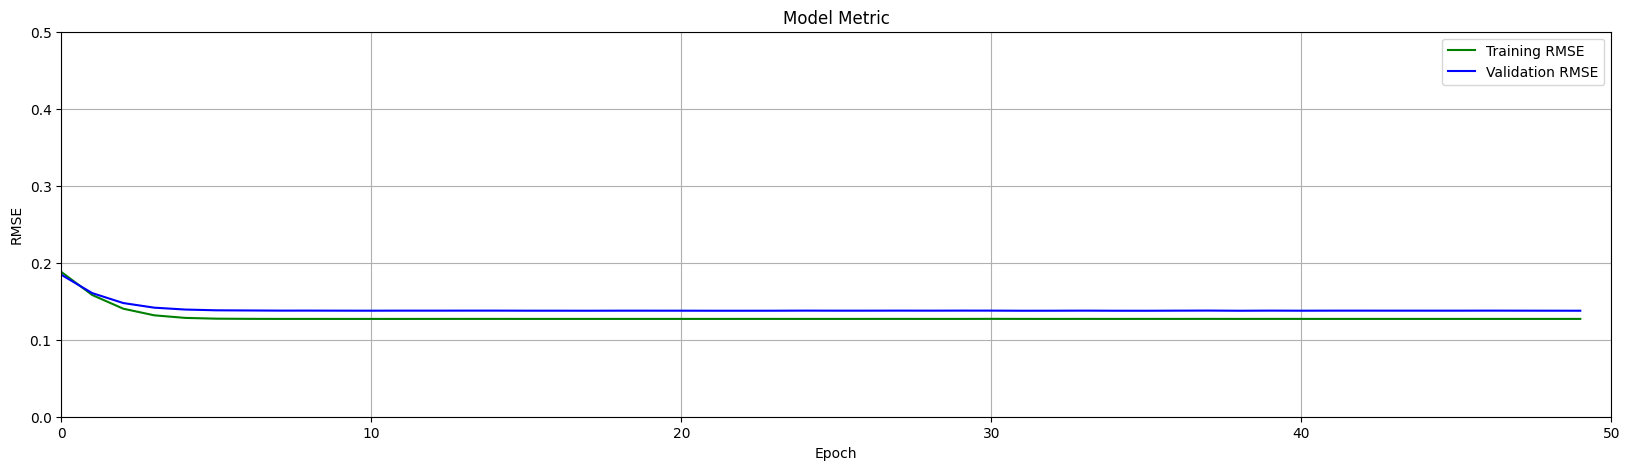

In [1141]:
plot_metric(model_history, "Validation", "root_mean_squared_error", "RMSE")

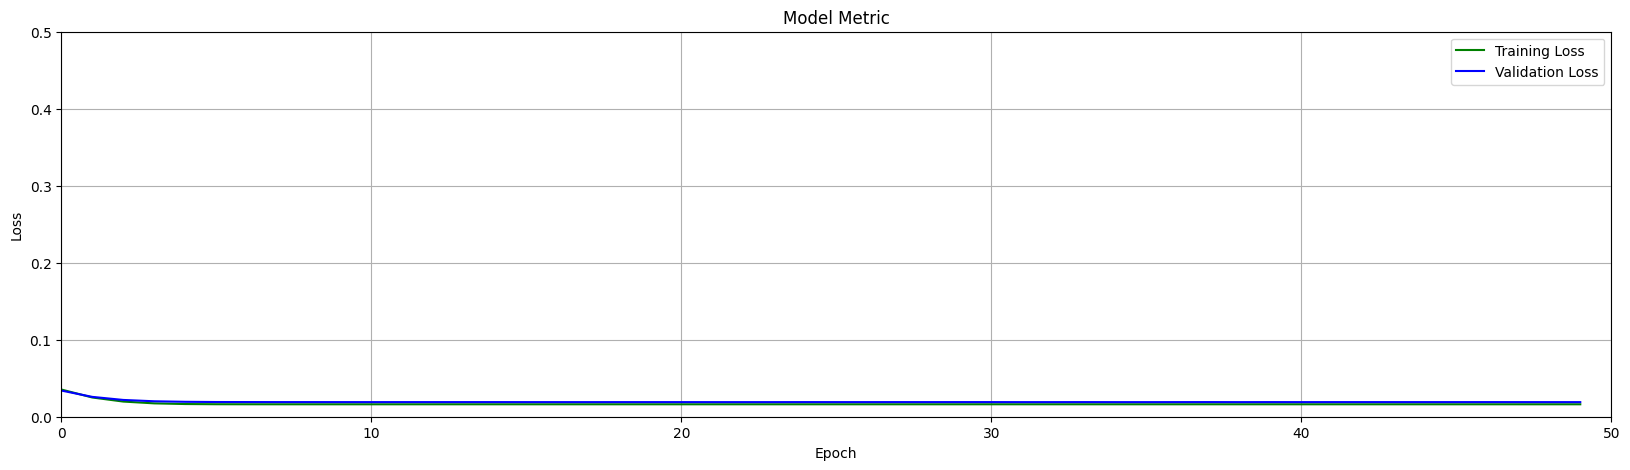

In [1142]:
plot_metric(model_history, "Validation", "loss", "Loss")

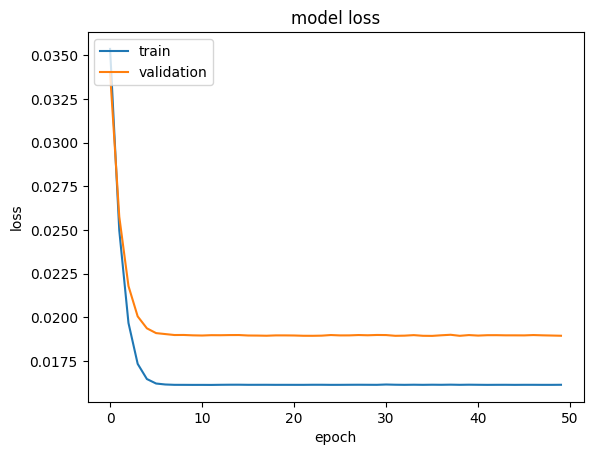

In [1143]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [1144]:
# Generate feature data that spans the range of interest for the independent variable.
x_val = X_test['Outlet_Type']

# Use the model to predict the dependent variable using one independent variable.
y_val = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [1145]:
x_val.shape

(1137,)

In [1146]:
y_val.shape

(1137, 1)

In [1147]:
y_val.size

1137

In [1148]:
x_val.size

1137

In [1149]:
xtrain.shape

(1704, 43)

In [1150]:
xtrain.size

73272

In [1151]:
xtrain_sh = xtrain.head(39)

In [1152]:
xtrain_sh.size

1677

In [1153]:
ytrain.size

1704

In [1154]:
ytrain.size

1704

In [1155]:
ytrain_sh = ytrain.head(1677)

In [1156]:
ytrain_sh.size

1677

In [1157]:
def plot_data(x_data, y_data, x, y, title=None):

    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([0,2])
    plt.ylim([0,1])
    plt.xlabel('Outlet Type')
    plt.ylabel('Outlet Sales')
    plt.title(title)
    plt.grid(True)
    plt.legend()

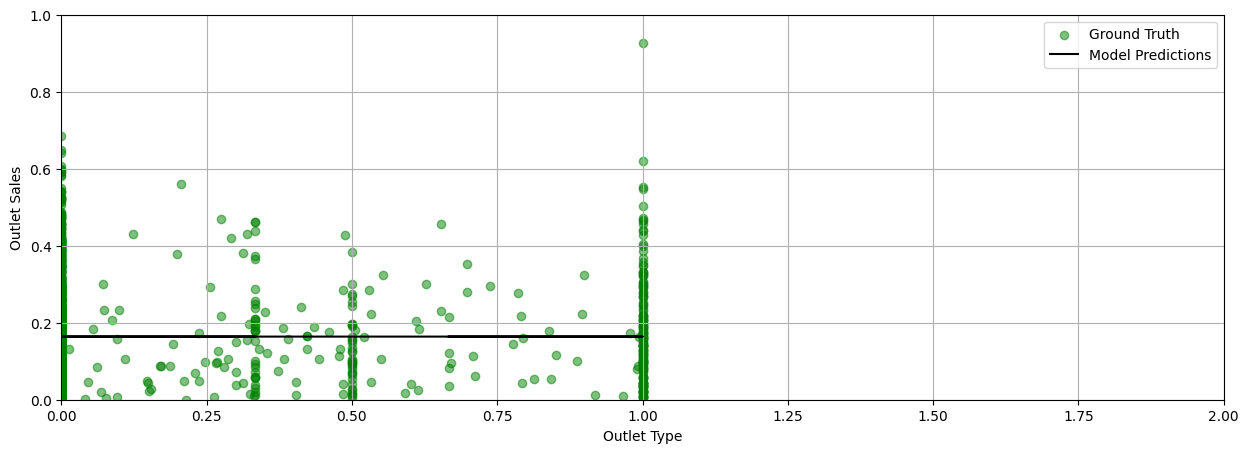

In [1158]:
plot_data(xtrain_sh, ytrain_sh, x_val, y_val, title='')

## ------

# 7. Now making the Predictions using Test Dataset and Evaluating Model Performance

## a. Load the Scaled and Normalized Test Dataset Using MinMax Scaler

In [1159]:
## loading the pre-processed dataset
data_test_minmax = pd.read_csv('/content/bigmart_outlet_sales_test_data_selected_features_for_modelevaluation_all_features.csv')

data_test_minmax_selected = pd.read_csv('/content/bigmart_outlet_sales_test_data_selected_features_for_modelevaluation_significant_features.csv')

In [1160]:
data_test_minmax.head(5)

,Item_Identifier,Outlet_Identifier,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales_Actual,Outlet_Location_Type,Outlet_Type
0,FDW58,OUT049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.964275,0.0,0.023374,0.323413,0.5,3735.1380,0.0,0.333333
1,FDW14,OUT017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.222983,1.0,0.118737,0.235849,0.5,443.4228,0.5,0.333333
2,NCN55,OUT010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.598095,0.0,0.307674,0.894140,0.5,2097.2700,1.0,0.000000
3,FDQ58,OUT017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.164335,0.0,0.047548,0.524488,0.5,732.3800,0.5,0.333333
4,FDY38,OUT027,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.484706,1.0,0.366458,0.862069,0.5,994.7052,1.0,1.000000


In [1161]:
data_test_minmax_selected.head(5)

,Item_Identifier,Outlet_Identifier,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_2007,Item_Weight,Item_Fat_Content,Item_Outlet_Sales_Actual,Item_Visibility,Item_MRP
0,FDW58,OUT049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.964275,0.0,3735.1380,0.023374,0.323413
1,FDW14,OUT017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.222983,1.0,443.4228,0.118737,0.235849
2,NCN55,OUT010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.598095,0.0,2097.2700,0.307674,0.894140
3,FDQ58,OUT017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.164335,0.0,732.3800,0.047548,0.524488
4,FDY38,OUT027,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.484706,1.0,994.7052,0.366458,0.862069


In [1162]:
bkp_data_test_minmax_Item_Identifier = data_test_minmax['Item_Identifier'].copy()
bkp_data_test_minmax_Outlet_Identifier = data_test_minmax['Outlet_Identifier'].copy()

bkp_data_test_minmax_selected_Item_Identifier = data_test_minmax_selected['Item_Identifier'].copy()
bkp_data_test_minmax_selected_Outlet_Identifier = data_test_minmax_selected['Outlet_Identifier'].copy()
bkp_data_test_minmax_selected_Outlet_Item_Outlet_Sales_Actual = data_test_minmax_selected['Item_Outlet_Sales_Actual'].copy()

In [1163]:
data_test_minmax.drop('Item_Identifier', axis=1, inplace=True)
data_test_minmax.drop('Outlet_Identifier', axis=1, inplace=True)

data_test_minmax_selected.drop('Item_Identifier', axis=1, inplace=True)
data_test_minmax_selected.drop('Outlet_Identifier', axis=1, inplace=True)

data_test_minmax_selected.drop('Item_Outlet_Sales_Actual', axis=1, inplace=True)

## b. Generate Predictions Using the Test data Set

In [1164]:
data_test_minmax_X = data_test_minmax
data_test_minmax_y = y_train_a

In [1165]:
data_test_minmax_X.shape

(5681, 43)

In [1166]:
y_train_a.shape

(8523,)

In [1167]:
data_test_minmax_selected_X = data_test_minmax_selected
data_test_minmax_selected_y = y_train_a

In [1168]:
data_test_minmax_selected_X.shape

(5681, 30)

In [1169]:
data_test_minmax_selected_X.dtypes

,0
Item_Type_Baking Goods,float64
Item_Type_Breads,float64
Item_Type_Breakfast,float64
Item_Type_Canned,float64
Item_Type_Dairy,float64
Item_Type_Frozen Foods,float64
Item_Type_Fruits and Vegetables,float64
Item_Type_Hard Drinks,float64
Item_Type_Health and Hygiene,float64
Item_Type_Household,float64


In [1170]:
# getting predictions for the  set using all test features
predictions_testset_all = model.predict(data_test_minmax_X)

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [1171]:
# getting predictions for the  set using significant features
predictions_testset_selected = model_2.predict(data_test_minmax_selected_X)

In [1172]:
predictions_testset_all

array([[0.1639623],
       [0.1639623],
       [0.1639623],
       ...,
       [0.1639623],
       [0.1639623],
       [0.1639623]], dtype=float32)

In [1173]:
predictions_testset_all.shape

(5681, 1)

In [1174]:
predictions_testset_selected

array([0.16228667, 0.16091336, 0.1579885 , ..., 0.16314016, 0.16955909,
       0.16091336], dtype=float32)

In [1175]:
predictions_testset_all.mean()

0.16396232

In [1176]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'r2_score', 'root_mean_squared_error', 'val_loss', 'val_r2_score', 'val_root_mean_squared_error'])


## c. Evaluate and Save the Model Using Test Data

In [1177]:
# Evaluate the model
#loss_test, metric_test, metric_test_1 = model.evaluate(data_test_minmax_X, predictions_testset_all, verbose=2)

loss_test, metric_test, metric_test_1 = model.evaluate(data_test_minmax_X, y_train_a_sh, verbose=2)

178/178 - 0s - 2ms/step - loss: 0.0170 - r2_score: -1.0061e-04 - root_mean_squared_error: 0.1304


In [1178]:
# Save Model Data-test (Model_1)
# bigmart_model_predictions_test_results['model_definition_1']="optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),loss='mse', metrics=[keras.metrics.RootMeanSquaredError()]"
# bigmart_model_predictions_test_results['model_summary_1_testset'] = model.summary()
# bigmart_model_predictions_test_results['test_set_predictions_1']= predictions_testset_all
# bigmart_model_predictions_test_results['test_set_model_evalutation_1']= loss, metric

# save_model['model_1'] = bigmart_model_predictions_test_results

# model.save("save_model['model_1'].keras")
# save_model.to_csv('bigmart_outlet_sales_prediction_minmax_rmprop_rmse_model_1_test.csv', index=False)

# MODEL_2
bigmart_model_predictions_test_results['model_definition_test_adam_all']="optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate,beta_1=0.9, beta_2=0.999,epsilon=1e-8,decay=0.0), loss='mse', metrics=[keras.metrics.RootMeanSquaredError()]]"
bigmart_model_predictions_test_results['model_summary_2_testset_adam_all'] = model.summary()
bigmart_model_predictions_test_results['test_set_predictions_adam_all']= predictions_testset_all
bigmart_model_predictions_test_results['test_set_model_evalutation_adam_all']= loss_test, metric_test

save_model['model_2_adam_all'] = bigmart_model_predictions_test_results

model.save("save_model['model_adam_all'].keras")
save_model.to_csv('bigmart_outlet_sales_prediction_minmax_adam_rmse_model_adam_all_test.csv', index=False)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 453 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 908 (3.55 KB)

In [1179]:
# Evaluate the model
#loss_test, metric_test, metric_test_1 = model.evaluate(data_test_minmax_selected_X, y_train_a_sh, verbose=2)

In [1180]:
# Save Model Data-test (Model_1)
# bigmart_model_predictions_test_results['model_definition_1']="optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),loss='mse', metrics=[keras.metrics.RootMeanSquaredError()]"
# bigmart_model_predictions_test_results['model_summary_1_testset'] = model.summary()
# bigmart_model_predictions_test_results['test_set_predictions_1']= predictions_testset_all
# bigmart_model_predictions_test_results['test_set_model_evalutation_1']= loss, metric

# save_model['model_1'] = bigmart_model_predictions_test_results

# model.save("save_model['model_1'].keras")
# save_model.to_csv('bigmart_outlet_sales_prediction_minmax_rmprop_rmse_model_1_test.csv', index=False)

# MODEL_2
# bigmart_model_predictions_test_results['model_definition_test_adam_selected']="optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate,beta_1=0.9, beta_2=0.999,epsilon=1e-8,decay=0.0), loss='mse', metrics=[keras.metrics.RootMeanSquaredError()]]"
# bigmart_model_predictions_test_results['model_summary_2_testset_adam_selected'] = model.summary()
# bigmart_model_predictions_test_results['test_set_predictions_adam_selected']= predictions_testset_all
# bigmart_model_predictions_test_results['test_set_model_evalutation_adam_selected']= loss_test, metric_test

# save_model['model_2_adam_selected'] = bigmart_model_predictions_test_results

# model.save("save_model['model_adam_selected'].keras")
# save_model.to_csv('bigmart_outlet_sales_prediction_minmax_adam_rmse_model_adam_selected_test.csv', index=False)


In [1181]:
# Train Data Set Item_Outlet_Sales
#y_test

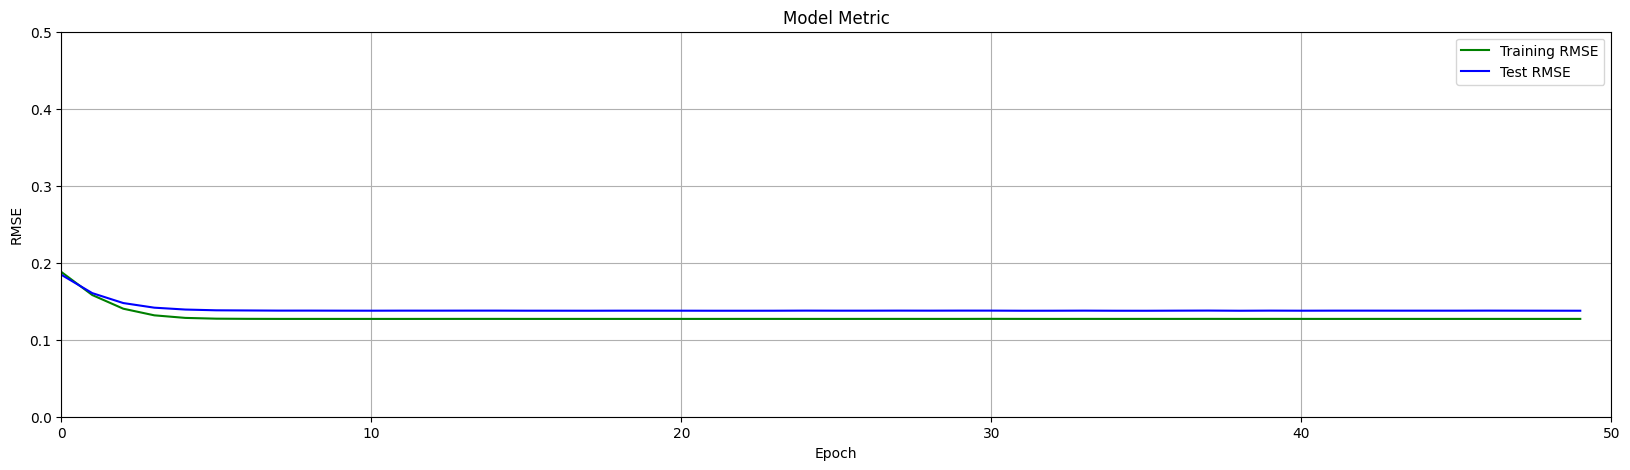

In [1182]:
plot_metric(model_history,"Test","root_mean_squared_error", "RMSE")

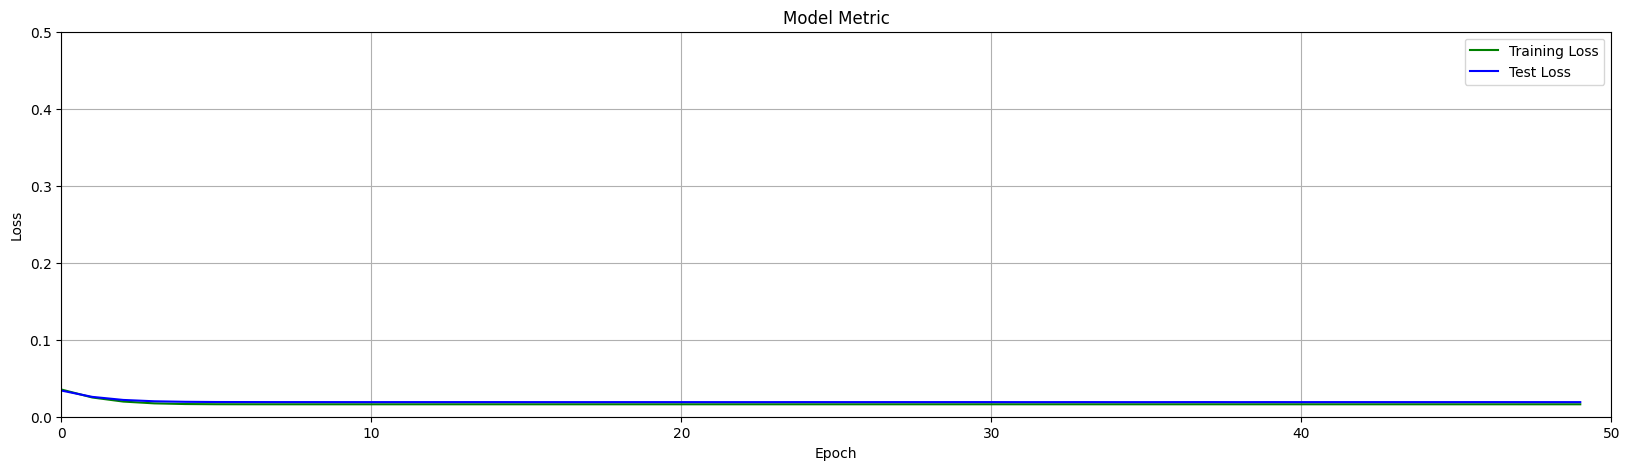

In [1183]:
plot_metric(model_history,"Test","loss", "Loss")

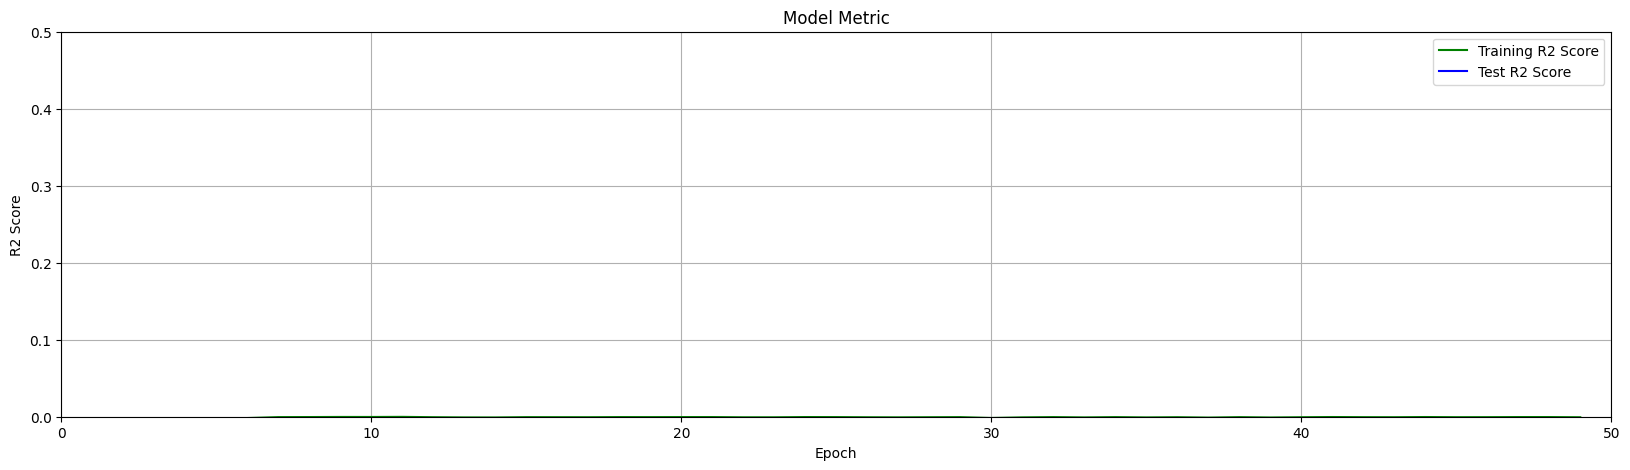

In [1184]:
plot_metric(model_history,"Test","r2_score", "R2 Score")

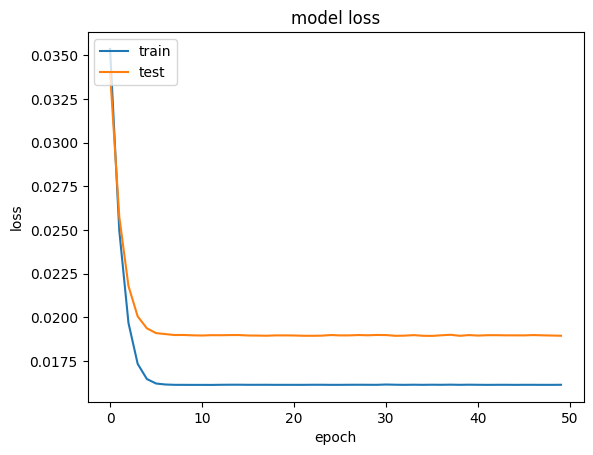

In [1185]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 8. Generation of Submission Data For Evaluation

In [1186]:
#from sklearn import
from sklearn import preprocessing
scaler_te = preprocessing.MinMaxScaler()
minmax_item_outlet_sales = scaler_te.fit_transform(data[['Item_Outlet_Sales']][:5681])



In [1187]:
minmax_item_outlet_sales = minmax_item_outlet_sales.astype('float32')

In [1188]:
minmax_item_outlet_sales.shape

(5681, 1)

In [1189]:
predictions_testset_all

array([[0.1639623],
       [0.1639623],
       [0.1639623],
       ...,
       [0.1639623],
       [0.1639623],
       [0.1639623]], dtype=float32)

In [1190]:
predictions_testset_all.mean()

0.16396232

In [1191]:
predictions_testset_all.shape

(5681, 1)

In [1192]:
# creating a list of index names
index_values = ['Item_Outlet_Sales']

# creating a list of column names
column_values = ['Item_Outlet_Sales']

# creating the dataframe
df_predictions_testset_all = pd.DataFrame(data = predictions_testset_all,
                  columns = column_values)

# displaying the dataframe
print(df_predictions_testset_all)

      Item_Outlet_Sales
0              0.163962
1              0.163962
2              0.163962
3              0.163962
4              0.163962
...                 ...
5676           0.163962
5677           0.163962
5678           0.163962
5679           0.163962
5680           0.163962

[5681 rows x 1 columns]


In [1193]:
#df_predictions_testset_all =pd.DataFrame({'Item_Outlet_Sales':predictions_testset_all})


In [1194]:
#df_predictions_testset_all.shape

In [1195]:
submission_data_output_scaled = pd.DataFrame()

submission_data_output_scaled.insert(0, 'Item_Identifier', bkp_data_test_minmax_Item_Identifier)
submission_data_output_scaled.insert(1, 'Outlet_Identifier', bkp_data_test_minmax_Outlet_Identifier)
submission_data_output_scaled.insert(2, 'Item_Outlet_Sales', predictions_testset_all)




In [1196]:
submission_data_output_unscaled_all = scaler_te.inverse_transform(df_predictions_testset_all)

In [1197]:
submission_data_output_unscaled_all

array([[2014.6548],
       [2014.6548],
       [2014.6548],
       ...,
       [2014.6548],
       [2014.6548],
       [2014.6548]], dtype=float32)

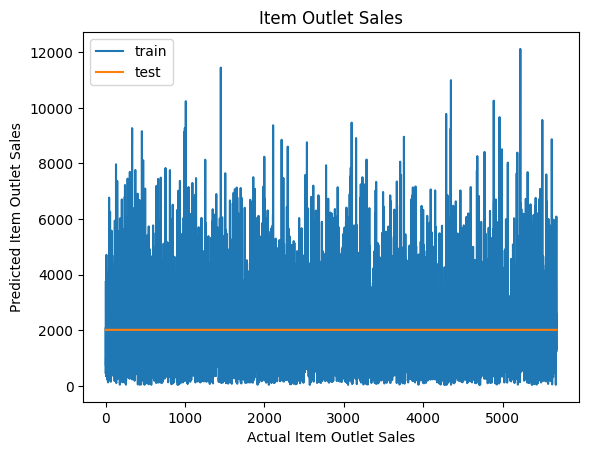

In [1198]:
# summarize history for accuracy
plt.plot(data['Item_Outlet_Sales'][:5681])
plt.plot(submission_data_output_unscaled_all)
plt.title('Item Outlet Sales')
plt.ylabel('Predicted Item Outlet Sales')
plt.xlabel('Actual Item Outlet Sales')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1199]:
submission_data_output_unscaled = pd.DataFrame()

submission_data_output_unscaled.insert(0, 'Item_Identifier', bkp_data_test_minmax_Item_Identifier)
submission_data_output_unscaled.insert(1, 'Outlet_Identifier', bkp_data_test_minmax_Outlet_Identifier)
submission_data_output_unscaled.insert(2, 'Item_Outlet_Sales', submission_data_output_unscaled_all)

In [1200]:
#Exporting a Data File for Submission.
#submission_data_unscaled_output = submission_data_output.to_csv('bigmart_submission_minmax_rmsprop_rmse_submission_data_1.csv')
submission_data_output_scaled_1 = submission_data_output_scaled.to_csv('bigmart_submission_minmax_adam_lr0.005_b16-e-30loss_rmse_submission_data_all_scaled.csv')

submission_data_output_unscaled_1 = submission_data_output_unscaled.to_csv('bigmart_submission_minmax_adam_lr0.005_b16-e-30loss_rmse_submission_data_all_unscaled.csv')

# **Summary of Results using LR, XGBoost, and Neural Network Model.**
- Using different Learning Rates.
- Using All and Features of Significance.
- With and Without Outliers

#**Learning Rate: 0.0005**

## **ALL Features**
### **TRAIN SET**
	- Actual Train Mean = 0.1642970077485156

  - **LR:**
  	- Training Mean Absolute Error 0.06297834494117917
	  - Training Root Mean Squared Error: 0.1613450605731818
	  - Training R2 Score 0.5709287225489612

  -**XGB:**
	- Accuracy : 1.0
	- RMSE = 0.125
	- MSE = 0.015639718704262152
	- MAE = 0.09902603083559106
	- R2 = 0.06279628783670987
	- Adjusted R2 = 0.05659648378711801


### **TEST SET**
  - **LR:**
 	- Test Mean Absolute Error     0.1278423066099372
 	- Test R2 Score -0.5561919388693397

  - **XGB:**
  	- Accuracy : 0.7480227791850307
  	- RMSE = 0.143
  	- MSE = 0.020395422400204342
  	- MAE = 0.11135060476335988
  	- R2 = -0.19879435209649343
  	- Adjusted R2 = -0.20772471087408362
	  - **Predicted_Test_Mean: 0.16353457**
  

  - **NN:Adam:**    
   - loss: 0.0172
	- r2_score: -8.3355e-03
	- root_mean_squared_error: 0.1310
  
   - **Predicted_Test_Mean: 0.16386086**

---------------------------------------------------------

##**Features of SIGNIFICANCE**

###- **TRAINING**

 	- Actual Train Mean: 0.1642970077485156

   - **LR:**
 	- Training Mean Absolute Error 0.07204315868387007
 	- Root Mean Squared Error: 0.0982837111471889
 	- Training R2 Score 0.4211471761273704

   - **XGB:**
  	- Accuracy : 1.0
  	- RMSE = 0.126
	  - MSE = 0.015848539847458695
	  - MAE = 0.0996559838962222
	  - R2 = 0.050282766699744186
	  - Adjusted R2 = 0.045803672689524455
	  - **Predicted_Test_Mean: 0.16428576**


### **TEST**

 - **LR:**
   - Test Mean Absolute Error     0.12248642228048164
- Root Mean Squared Error: 0.15649191351304714
- Test R2 Score -0.4394473543883126
  - **Predicted_Test_Mean: 0.1638754354650507**

- **XGB:**
  - Accuracy : 1.0
  - RMSE = 0.131
 - MSE = 0.01704826743318137
 - MAE = 0.10279519278942896
 - R2 = -0.002056555186797704
 - Adjusted R2 = -0.007377209462125833
 - **Predicted_Test_Mean:0.16428071**

- **NN-Adam**
	- loss: 0.0171
	- r2_score: -3.0015e-03
	- root_mean_squared_error: 0.1306
	- **Predicted_Test_Mean:0.16428071**



-------------------------------------------------------------------
------------------------------------------------------------------

#*Learning Rate: 0.0054*

## **ALL Features**
### **TRAIN SET**
	- Actual Train Mean = 0.1642970077485156

  - **LR:**
   - Training Mean Absolute Error 0.06297834494117917
	- Training Root Mean Squared Error: 0.1613450605731818
	- Training R2 Score 0.5709287225489612

  - **XGB:**
	- Accuracy : 1.0
	- RMSE = 0.086
	- MSE = 0.007380457359082421
	- MAE = 0.06598655286937646
	- R2 = 0.5577291276658389
	- Adjusted R2 = 0.554803410759549


### **TEST SET**
  - **LR:**
 	- Test Mean Absolute Error     0.1278423066099372
 	- Test R2 Score -0.5561919388693397

  - **XGB:**
  	- Accuracy : 0.7480227791850307
  	- RMSE = 0.143
  	- MSE = 0.020395422400204342
  	- MAE = 0.11135060476335988
  	- R2 = -0.19879435209649343
  	- Adjusted R2 = -0.20772471087408362
   
    - **Predicted_Test_Mean: 0.16353457**
  

  - **NN:Adam:**
  	- loss: 0.0172
	  - r2_score: -8.3355e-03
	  - root_mean_squared_error: 0.1310
  	- **Predicted_Test_Mean: 0.16386086**

---------------------------------------------------------

##**Features of SIGNIFICANCE**

###- **TRAINING**

 	  - Actual Train Mean: 0.1642970077485156

   - **LR:**
 	- Training Mean Absolute Error 0.07204315868387007
 	- Root Mean Squared Error: 0.0982837111471889
 	- Training R2 Score 0.4211471761273704

   - **XGB:**
  	- Accuracy : 1.0
  	- RMSE = 0.095
  	- MSE = 0.009024183096083665
  	- MAE = 0.07267235988527049
   - R2 = 0.45922953879049133
  - Adjusted R2 = 0.4566791357349521
    -  **Predicted_Test_Mean: 0.16353457**


### **TEST**

 -**LR:**
  - Test Mean Absolute Error     0.12248642228048164
  	- Root Mean Squared Error: 0.15649191351304714
  	- Test R2 Score -0.4394473543883126
  	- **Predicted_Test_Mean: 0.1638754354650507**

- **XGB:**
  - Accuracy : 1.0
  - RMSE = 0.14
  - MSE = 0.01965676138470838
  - MAE = 0.10942817219097604
  - R2 = -0.15537761690391672
  - Adjusted R2 = -0.16151236531225614
  - **Predicted_Test_Mean:0.16386086**


-------------------------------------------------------------
---------------------------------------------------------------

#**Learning Rate: 0.008**
## **ALL Features**
###**TRAIN SET**
	- Actual Mean = 0.1642970077485156

  - **LR:**
	- Training Mean Absolute Error 0.06297834494117917
	- Training Root Mean Squared Error: 0.1613450605731818
	- Training R2 Score 0.5709287225489612

  -**XGB:**
	  - Accuracy : 1.0
  - RMSE = 0.086
	- MSE = 0.007380457359082421
	- MAE = 0.06598655286937646
	- R2 = 0.5577291276658389
	- Adjusted R2 = 0.554803410759549


### **TEST SET**

  **LR:**
  - Test Mean Absolute Error     0.1278423066099372
	- Root Mean Squared Error: 0.1613450605731818
- Test R2 Score -0.5561919388693397
	- **Predicted_Test_Mean: 0.16431755625935135**

  - **XGB:**
  	- Accuracy : 0.7480227791850307
	  - RMSE = 0.143
  	- MSE = 0.020395422400204342
  	- MAE = 0.11135060476335988
  	- R2 = -0.19879435209649343
  	- Adjusted R2 = -0.20772471087408362
	  - **Predicted_Test_Mean: 0.16353457**

- **NN:Adam:**
  - loss: 0.0172
 - r2_score: -8.3355e-03
 - root_mean_squared_error: 0.1310
 - **Predicted_Test_Mean: 0.16386086**

------------------------------------------------


## **Features of SIGNIFICANCE**

### **TRAINING**

 - **LR:**
  - Training Mean Absolute Error 0.07204315868387007
- Root Mean Squared Error: 0.0982837111471889
- Training R2 Score 0.4211471761273704
- **Predicted_Train_Mean: 0.1642970077485156**

- **XGB:**
 - Accuracy : 1.0
 - RMSE = 0.095
 - MSE = 0.009024183096083665
 - MAE = 0.07267235988527049
 - R2 = 0.45922953879049133
 - Adjusted R2 = 0.4566791357349521
 - **Predicted_Test_Mean: 0.16353457**


### **TEST**

 - **LR:**
  - Test Mean Absolute Error     0.12248642228048164
  - Root Mean Squared Error: 0.15649191351304714
  - Test R2 Score -0.4394473543883126
- **Predicted_Test_Mean: 0.1638754354650507**

- **XGB:**
  - Accuracy : 1.0
  - RMSE = 0.14
  - MSE = 0.01965676138470838
  - MAE = 0.10942817219097604
  - R2 = -0.15537761690391672
  - Adjusted R2 = -0.16151236531225614
 - **Predicted_Test_Mean:0.16386086**
